<h1><center>  
ACCIDENT SEVERITY PREDICTIVE MACHINE LEARNING MODEL 

_Prepared by: **Abdurahman Alrobaie** as part of Data Science Coursera Course Capstone_

# TABLE OF CONTENTS

* [1.INTRODUCTION](#chapter1)
* [2.DATA UNDERSTANDING](#chapter2)
* [3.EXPLORATORY DATA ANALYSIS (EDA)](#chapter3)
* [4.DATA PREPARATION](#chapter4)
    * [4.1 Dealing with Missing Data](#section_4_1)
    * [4.2 Processing the Data](#section_4_2)
    * [4.3 Balancing the Data](#section_4_3)
* [5.MODEL DEVELOPMENT](#chapter5)
    * [4.1 Four Classes](#section_5_1)
    * [4.2 Two Classes](#section_5_2)
* [6.MODEL EVALUATION](#chapter6)
* [7.CONCLUSION](#chapter7)

# 1.INTRODUCTION: BUSINESS PROBLEM <a class="anchor" id="chapter1"></a>

Traffic accidents are one of the daily incidents within any community that causes severe property damage, serious injuries, and high number of fatalities. According to Washington State Department of Transportation (WSDOT), there is a car accident for every 4 minutes while a person dies due to some of these accidents every 20 hours. Governments around the world invest heavily in making roads safer and reducing this threatening danger. To take protective measures against such incidents, individuals are advised to comply with certain laws and avoid some conditions when driving is dangerous. However, would not it be useful if one could predict the severity of an accident given some conditions are present when driving? For example, if it was raining and dark outside and you planned to visit a friend but you wanted to know whether driving with these conditions would result in an accident. Moreover, how severe that accident would be if the road was wet and it involved some intersections. This project, as  part of Coursera Data Science Capstone, aims to create a machine learning model to predict the severity of a car accident that could occur given some conditions are present.

The project's objective is to predict the severity of car accident that could occur based on given features. These features include weather condition, driving speed, light condition, and others. The predicted severity levels are: 
-  Fatal
-  Serious Injury 
-  Injury
-  Propery Damage


Since the predicted variable is categorical, a machine learning classification model is trained by
Seattle Geo Data.


# 2.DATA UNDERSTANDING <a class="anchor" id="chapter2"></a>

In [1]:
import pandas as pd

The data is retrieved from Seattle city accident data base. It involves a lot of features about the recorded accidents and the severity of each. All the features are explained in the [metadata file](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf). The data included are as the following: 

|Feature|Data Type, Length|Description|
|:-|:-|:-|
|OBJECTID|ObjectID|ESRI unique identifier|
|SHAPE|Geometry|ESRI geometry field|
|INCKEY|Long|A unique key for the incident|
|COLDETKEY|Long|Secondary key for the incident|
|ADDRTYPE|Text, 12|Collision address type: Alley, Block, Intersection|
|INTKEY|Double|Key that corresponds to the intersection associated with a collision|
|LOCATION|Text, 255|Description of the general location of the collision|
|EXCEPTRSNCODE|Text, 10|Not specified|
|EXCEPTRSNDESC|Text, 300|Not specified|
|SEVERITYCODE|Text, 100|A code that corresponds to the severity of the collision: 3—fatality, 2b—serious injury, 2—injury, 1—prop damage, 0—unknown|
|SEVERITYDESC|Text|A detailed description of the severity of the collision|
|COLLISIONTYPE|Text, 300|Collision type|
|PERSONCOUNT|Double|The total number of people involved in the collision|
|PEDCOUNT|Double|The number of pedestrians involved in the collision. This is entered by the state.|
|PEDCYLCOUNT|Double|The number of bicycles involved in the collision. This is entered by the state.|
|VEHCOUNT|Double|The number of vehicles involved in the collision. This is entered by the state.|
|INJURIES|Double|The number of total injuries in the collision. This is entered by the state.|
|SERIOUSINJURIES|Double|The number of serious injuries in the collision. This is entered by the state.|
|FATALITIES|Double|The number of fatalities in the collision. This is entered by the state.|
|INCDATE|Date|The date of the incident.|
|INCDTTM|Text, 30|The date and time of the incident.|
|JUNCTIONTYPE|Text, 300|Category of junction at which collision took place|
|SDOT_COLCODE|Text, 10|A code given to the collision by SDOT.|
|SDOT_COLDESC|Text, 300|A description of the collision corresponding to the collision code.|
|INATTENTIONIND|Text, 1|Whether or not collision was due to inattention. (Y/N)|
|UNDERINFL|Text, 10|Whether or not a driver involved was under the influence of drugs or alcohol.|
|WEATHER|Text, 300|A description of the weather conditions during the time of the collision.|
|ROADCOND|Text, 300|The condition of the road during the collision.|
|LIGHTCOND|Text, 300|The light conditions during the collision.|
|PEDROWNOTGRNT|Text, 1|Whether or not the pedestrian right of way was not granted. (Y/N)|
|SDOTCOLNUM|Text, 10|A number given to the collision by SDOT.|
|SPEEDING|Text, 1|Whether or not speeding was a factor in the collision. (Y/N)|
|ST_COLCODE|Text, 10|A code provided by the state that describes the collision. For more information about these codes, please see the State Collision Code Dictionary.|
|ST_COLDESC|Text, 300|A description that corresponds to the state’s coding designation.|
|SEGLANEKEY|Long|A key for the lane segment in which the collision occurred.|
|CROSSWALKKEY|Long|A key for the crosswalk at which the collision occurred.|
|HITPARKEDCAR|Text, 1|Whether or not the collision involved hitting a parked car. (Y/N)

In [2]:
df = pd.read_csv(r'D:/Downloads/Collisions.csv')

The first 5 rows of the data set

In [3]:
df.head()

X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO     STATUS  \
0 -122.386772  47.564720         1  326234     327734  E984735    Matched   
1 -122.341806  47.686934         2  326246     327746  E985430    Matched   
2 -122.374899  47.668666         3  329254     330754  EA16720    Matched   
3 -122.300758  47.683047         4   21200      21200  1227970    Matched   
4 -122.313053  47.567241         5   17000      17000  1793348  Unmatched   

       ADDRTYPE   INTKEY                                          LOCATION  \
0  Intersection  31893.0               CALIFORNIA AVE SW AND SW GENESEE ST   
1  Intersection  24228.0                         STONE AVE N AND N 80TH ST   
2         Block      NaN  NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW   
3  Intersection  24661.0                        25TH AVE NE AND NE 75TH ST   
4         Block      NaN     S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S   

   ... ROADCOND                LIGHTCOND PEDROWNOTGRNT SDOTCOLNUM SPEEDING  \
0  ...      Dry                 Daylight             Y        NaN      NaN   
1  ...      Wet  Dark - Street Lights On           NaN        NaN      NaN   
2  ...      Dry                 Daylight           NaN        NaN      NaN   
3  ...      Wet  Dark - Street Lights On           NaN  4160038.0      NaN   
4  ...      NaN                      NaN           NaN  4289025.0      NaN   

   ST_COLCODE                                         ST_COLDESC  SEGLANEKEY  \
0           2               Vehicle turning left hits pedestrian           0   
1          10                                  Entering at angle           0   
2          11  From same direction - both going straight - bo...           0   
3          28  From opposite direction - one left turn - one ...           0   
4         NaN                                                NaN           0   

   CROSSWALKKEY  HITPARKEDCAR  
0             0             N  
1             0             N  
2             0             N  
3             0             N  
4             0             N  

[5 rows x 40 columns]

In [4]:
df.shape

(221266, 40)

In [5]:
df.describe()

X              Y       OBJECTID         INCKEY  \
count  213797.000000  213797.000000  221266.000000  221266.000000   
mean     -122.330752      47.620205  110633.500000  144603.603179   
std         0.030054       0.056040   63874.136669   89039.925169   
min      -122.419091      47.495573       1.000000    1001.000000   
25%      -122.349280      47.577302   55317.250000   71603.250000   
50%      -122.330348      47.616053  110633.500000  127122.500000   
75%      -122.311998      47.664290  165949.750000  209654.750000   
max      -122.238949      47.734142  221266.000000  333683.000000   

           COLDETKEY         INTKEY    PERSONCOUNT       PEDCOUNT  \
count  221266.000000   71823.000000  221266.000000  221266.000000   
mean   144831.128840   37616.272768       2.226230       0.038103   
std     89413.579421   51905.450406       1.470364       0.201745   
min      1001.000000   23807.000000       0.000000       0.000000   
25%     71603.250000   28653.000000       2.000000       0.000000   
50%    127122.500000   29973.000000       2.000000       0.000000   
75%    209874.750000   33984.000000       3.000000       0.000000   
max    335183.000000  757580.000000      93.000000       6.000000   

         PEDCYLCOUNT       VEHCOUNT       INJURIES  SERIOUSINJURIES  \
count  221266.000000  221266.000000  221266.000000    221266.000000   
mean        0.027293       1.728544       0.373844         0.015149   
std         0.164345       0.831224       0.732086         0.157908   
min         0.000000       0.000000       0.000000         0.000000   
25%         0.000000       2.000000       0.000000         0.000000   
50%         0.000000       2.000000       0.000000         0.000000   
75%         0.000000       2.000000       1.000000         0.000000   
max         2.000000      15.000000      78.000000        41.000000   

          FATALITIES   SDOT_COLCODE    SDOTCOLNUM     SEGLANEKEY  CROSSWALKKEY  
count  221266.000000  221265.000000  1.272050e+05  221266.000000  2.212660e+05  
mean        0.001681      13.383558  7.971063e+06     261.441573  9.588454e+03  
std         0.044562       7.302961  2.611523e+06    3248.850406  7.150262e+04  
min         0.000000       0.000000  1.007024e+06       0.000000  0.000000e+00  
25%         0.000000      11.000000  6.007029e+06       0.000000  0.000000e+00  
50%         0.000000      11.000000  8.033011e+06       0.000000  0.000000e+00  
75%         0.000000      14.000000  1.018101e+07       0.000000  0.000000e+00  
max         5.000000      87.000000  1.307202e+07  525241.000000  5.239700e+06

## Dropping Features
However, the metadata files shows that many attributes are either repeated or unuseful in predicting the data set. Additionally, these attributes make the data set congested for the Exploratory Data Analysis (EDA).Those attributes are the following: 

### Identifying Features
Features that are used by the Seattle Geo Data to uniquely identify each accident attributes. 

|Feature|Data Type, Length|Description|Reason|
|:-|:-|:-|:-|
|OBJECTID|ObjectID|ESRI unique identifier|Accident ID is not required|
|INCKEY|Long|A unique key for the incident|Accident's key is not rqeuired|
|COLDETKEY|Long|Secondary key for the incident|Accident's key is not rqeuired|
|SEGLANEKEY|Long|A key for the lane segment in which the collision occurred|Lane segment key is not required|
|CROSSWALKKEY|Long|A key for the crosswalk at which the collision occurred|Cross walk key is not required|

### Duplicate Features
Features that are repeating data in other features

|Feature|Data Type, Length|Description|Reason|
|:-|:-|:-|:-|
|INCDATE|Date|The date of the incident.|INCTMM includes both time and date|
|ADDRTYPE|Text, 12|Collision address type: Alley, Block, Intersection|JUNCTIONTYPE includes both address type and relations with other address types|

### Description Features
Features that describe the accident, location, and damages. They do not help in predicting the target

|Feature|Data Type, Length|Description|Reason|
|:-|:-|:-|:-|
|LOCATION|Text, 255|Description of the general location of the collision|Location description is not required|
|SEVERITYDESC|Text|A detailed description of the severity of the collision|Severity Description is not required|
|SDOT_COLDESC|Text, 300|A description of the collision corresponding to the collision code|Collision description by SDOT is not required|
|ST_COLDESC|Text, 300|A description that corresponds to the state’s coding designation|Collision description by the state is not required|




### Unkown Features
Features that are not explained by the metadata file.

|Feature|Data Type, Length|Description|Reason|
|:-|:-|:-|:-|
|STATUS|Text, 10|Not specified|Unknwon|
|EXCEPTRSNCODE|Text, 10|Not specified|Unknwon|
|EXCEPTRSNDESC|Text, 300|Not specified|Unknwon|
|REPORTNO|Text, 10|Not specified|Unknwon|

### Features Representing Results of the Accident 
Features that cannot be given prior to the accident to predict the severity since they represent the results of the accident.

|Feature|Data Type, Length|Description|Reason|
|:-|:-|:-|:-|
|PERSONCOUNT|Double|The total number of people involved in the collision|Feature representing the results|
|PEDCOUNT|Double|The number of pedestrians involved in the collision. This is entered by the state.|Feature representing the results|
|PEDCYLCOUNT|Double|The number of bicycles involved in the collision. This is entered by the state.|Feature representing the results|
|VEHCOUNT|Double|The number of vehicles involved in the collision. This is entered by the state.|Feature representing the results|
|INJURIES|Double|The number of total injuries in the collision. This is entered by the state.|Feature representing the results|
|SERIOUSINJURIES|Double|The number of serious injuries in the collision. This is entered by the state.|Feature representing the results|
|FATALITIES|Double|The number of fatalities in the collision. This is entered by the state.|Feature representing the results|


The remaining feautres are stored in a separate data frame 

In [6]:
df1 = df.loc[:,['X','Y','SEVERITYCODE','COLLISIONTYPE','INCDTTM','JUNCTIONTYPE','ST_COLCODE','SDOT_COLCODE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR']]
df1.head()

X          Y SEVERITYCODE COLLISIONTYPE                 INCDTTM  \
0 -122.386772  47.564720            2    Pedestrian  11/20/2019 10:25:00 AM   
1 -122.341806  47.686934            2        Angles   11/18/2019 5:01:00 PM   
2 -122.374899  47.668666            1     Sideswipe    2/20/2020 8:42:00 AM   
3 -122.300758  47.683047            1     Left Turn                6/8/2004   
4 -122.313053  47.567241            0           NaN              10/15/2004   

                              JUNCTIONTYPE ST_COLCODE  SDOT_COLCODE  \
0   At Intersection (intersection related)          2          24.0   
1   At Intersection (intersection related)         10          11.0   
2  Mid-Block (not related to intersection)         11          14.0   
3   At Intersection (intersection related)         28          11.0   
4     Mid-Block (but intersection related)        NaN          11.0   

  INATTENTIONIND UNDERINFL  WEATHER ROADCOND                LIGHTCOND  \
0            NaN         N    Clear      Dry                 Daylight   
1            NaN         N  Raining      Wet  Dark - Street Lights On   
2            NaN         N    Clear      Dry                 Daylight   
3            NaN         0  Raining      Wet  Dark - Street Lights On   
4            NaN       NaN      NaN      NaN                      NaN   

  PEDROWNOTGRNT SPEEDING HITPARKEDCAR  
0             Y      NaN            N  
1           NaN      NaN            N  
2           NaN      NaN            N  
3           NaN      NaN            N  
4           NaN      NaN            N

In [7]:
df1.shape

(221266, 16)

# 3.EXPLORATORY DATA ANALYSIS (EDA) <a class="anchor" id="chapter3"></a>

In [8]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import numpy as np

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221266 entries, 0 to 221265
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   X               213797 non-null  float64
 1   Y               213797 non-null  float64
 2   SEVERITYCODE    221265 non-null  object 
 3   COLLISIONTYPE   194767 non-null  object 
 4   INCDTTM         221266 non-null  object 
 5   JUNCTIONTYPE    209299 non-null  object 
 6   ST_COLCODE      211853 non-null  object 
 7   SDOT_COLCODE    221265 non-null  float64
 8   INATTENTIONIND  30188 non-null   object 
 9   UNDERINFL       194787 non-null  object 
 10  WEATHER         194578 non-null  object 
 11  ROADCOND        194658 non-null  object 
 12  LIGHTCOND       194490 non-null  object 
 13  PEDROWNOTGRNT   5188 non-null    object 
 14  SPEEDING        9913 non-null    object 
 15  HITPARKEDCAR    221266 non-null  object 
dtypes: float64(3), object(13)
memory usage: 27.0+ MB


The percentage of missing data in each feature

In [10]:
round(df1.isna().sum() / len(df1), 4) * 100

X                  3.38
Y                  3.38
SEVERITYCODE       0.00
COLLISIONTYPE     11.98
INCDTTM            0.00
JUNCTIONTYPE       5.41
ST_COLCODE         4.25
SDOT_COLCODE       0.00
INATTENTIONIND    86.36
UNDERINFL         11.97
WEATHER           12.06
ROADCOND          12.03
LIGHTCOND         12.10
PEDROWNOTGRNT     97.66
SPEEDING          95.52
HITPARKEDCAR       0.00
dtype: float64

In [11]:
df1.describe(include = 'all')

X              Y SEVERITYCODE COLLISIONTYPE    INCDTTM  \
count   213797.000000  213797.000000       221265        194767     221266   
unique            NaN            NaN            5            10     169122   
top               NaN            NaN            1    Parked Car  11/2/2006   
freq              NaN            NaN       137485         48455        103   
mean      -122.330752      47.620205          NaN           NaN        NaN   
std          0.030054       0.056040          NaN           NaN        NaN   
min       -122.419091      47.495573          NaN           NaN        NaN   
25%       -122.349280      47.577302          NaN           NaN        NaN   
50%       -122.330348      47.616053          NaN           NaN        NaN   
75%       -122.311998      47.664290          NaN           NaN        NaN   
max       -122.238949      47.734142          NaN           NaN        NaN   

                                   JUNCTIONTYPE ST_COLCODE   SDOT_COLCODE  \
count                                    209299     211853  221265.000000   
unique                                        7         63            NaN   
top     Mid-Block (not related to intersection)         32            NaN   
freq                                     101579      44842            NaN   
mean                                        NaN        NaN      13.383558   
std                                         NaN        NaN       7.302961   
min                                         NaN        NaN       0.000000   
25%                                         NaN        NaN      11.000000   
50%                                         NaN        NaN      11.000000   
75%                                         NaN        NaN      14.000000   
max                                         NaN        NaN      87.000000   

       INATTENTIONIND UNDERINFL WEATHER ROADCOND LIGHTCOND PEDROWNOTGRNT  \
count           30188    194787  194578   194658    194490          5188   
unique              1         4      12        9         9             1   
top                 Y         N   Clear      Dry  Daylight             Y   
freq            30188    103482  114361   128171    119166          5188   
mean              NaN       NaN     NaN      NaN       NaN           NaN   
std               NaN       NaN     NaN      NaN       NaN           NaN   
min               NaN       NaN     NaN      NaN       NaN           NaN   
25%               NaN       NaN     NaN      NaN       NaN           NaN   
50%               NaN       NaN     NaN      NaN       NaN           NaN   
75%               NaN       NaN     NaN      NaN       NaN           NaN   
max               NaN       NaN     NaN      NaN       NaN           NaN   

       SPEEDING HITPARKEDCAR  
count      9913       221266  
unique        1            2  
top           Y            N  
freq       9913       209290  
mean        NaN          NaN  
std         NaN          NaN  
min         NaN          NaN  
25%         NaN          NaN  
50%         NaN          NaN  
75%         NaN          NaN  
max         NaN          NaN

### SEVERITYCODE
shows the target variable to be predicted and it has the following classes:

- 3—Fatality
- 2b—Serious injury 
- 2—Injury 
- 1—Property damage
- 0—Unknown


The values counted for severity levels are as the following:


In [12]:
df1['SEVERITYCODE'].value_counts()

1     137485
2      58698
0      21635
2b      3098
3        349
Name: SEVERITYCODE, dtype: int64

Since the value of 0, Unkown, is not defined and does not contribute in predicting the severity level, it is changed to NAN such that it will be detected later on

In [13]:
df1['SEVERITYCODE'].replace('0', np.nan, inplace=True)

Additionally, the values are mapped to new numbers such that 2b is changed to 3 and 3 to 4

In [14]:
df1['SEVERITYCODE'].replace('3', '4', inplace=True)
df1['SEVERITYCODE'].replace('2b', '3', inplace=True)

Dropping accidents with NaN severity level

In [15]:
df1.dropna(axis=0, how='any',thresh=None, subset=['SEVERITYCODE'], inplace=True)

In [16]:
df1['SEVERITYCODE'] =  df1['SEVERITYCODE'].astype('int64')
df1['SEVERITYCODE'].value_counts()

1    137485
2     58698
3      3098
4       349
Name: SEVERITYCODE, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

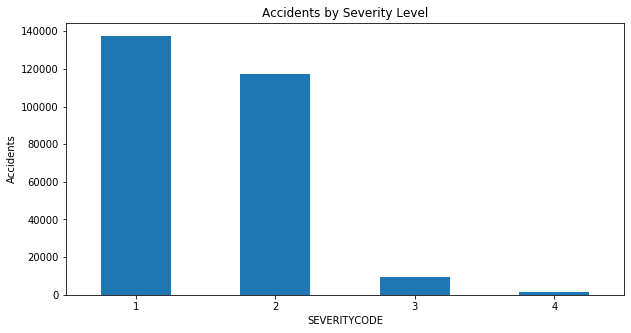

In [17]:
df1['SEVERITYCODE'].groupby(df1['SEVERITYCODE']).sum().plot(kind='bar', figsize=(10,5))
plt.title('Accidents by Severity Level')
plt.ylabel('Accidents')
plt.xticks(rotation=360)

### X & Y, Coordinates
For each accident there are coordinates that specifies its location

In [18]:
# !conda install -c conda-forge folium=0.5.0 --yes
import folium #A map visualization library

print('Folium installed and imported!')

Folium installed and imported!


Due to the huge number of accidents that might results in a map crowded by markers, only 500 incidents were chosen

In [19]:
Seattle_map = folium.Map(location=[47.620205, -122.330752], zoom_start=11,tiles='Stamen Toner')
Seattle_map

df_locations = df1.dropna(axis=0, how='any',thresh=None, subset=['Y'], inplace=False)
df_locations = df_locations.head(500)
df_locations.dtypes

X                 float64
Y                 float64
SEVERITYCODE        int64
COLLISIONTYPE      object
INCDTTM            object
JUNCTIONTYPE       object
ST_COLCODE         object
SDOT_COLCODE      float64
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SPEEDING           object
HITPARKEDCAR       object
dtype: object

In [20]:
#Plotting accidents with colors indicating the severity on Seattle map 
a = 0
for lat, lng, in zip(df_locations.Y, df_locations.X):
    if df_locations.iloc[a,2] == 4 :
        colors='red'
    elif df_locations.iloc[a,2] == 3:
        colors= 'orange'
    elif df_locations.iloc[a,2] == 2:
        colors= 'yellow'
    else: 
        colors='green'
    Seattle_map.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, 
            color=colors,
            fill=True,
            fill_color= colors,
            fill_opacity=1
        )
    )
    a = a+1

In [21]:
Seattle_map

|Color|Severity Level|Description|
|:-|:-|:-|
|Red|4|Fatality|
|Orange|3|Serious Injury|
|Yellow|2|Injury|
|Green|1|Property Damage|


A map with clustered markers indicate the dentisty from a larger scale and provides furthermore information when zoomed in

In [22]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
Seattle_map = folium.Map(location =[47.620205, -122.330752], zoom_start = 11)

# instantiate a mark cluster object for the incidents in the dataframe
accidents = plugins.MarkerCluster().add_to(Seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_locations.Y, df_locations.X, df_locations.HITPARKEDCAR):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(accidents)

# display map
Seattle_map

To further explore the data, a choropleth map of Seattle neighborhoods with the number of total accidents in each neighborhood is generated. However, the neighborhood of where the accident occured was not provided. Therefore, the geojson file was retreived from Seattle GeoData and the results where stored in a new data frame.

In [23]:
# conda install shapely

In [24]:
# !pip install shapely

In [25]:
# import requests 
# url = "https://opendata.arcgis.com/datasets/b76cdd45f7b54f2a96c5e97f2dda3408_2.geojson"
# response = requests.get(url)
# json = response.json()

In [26]:
#To loop into the df and summate accidents per each neighborhood
# # from shapely.geometry import shape, GeometryCollection, Point
# distr = df1.loc[:,['X','Y']]
# # distr = distr.head(2000)
# xcor = distr['X'].tolist()
# ycor = distr['Y'].tolist()
# neigh.clear()
# acc.clear()
# neighborhood.clear()
# for x,y in zip(ycor,xcor):
#     point = Point(y,x)
#     for feature in json['features']:
#         polygon = shape(feature['geometry'])
#         if polygon.contains(point) & (feature["properties"]['S_HOOD'] in neigh):
# #             print(feature["properties"]['S_HOOD'])
#             acc[neigh.index(feature["properties"]['S_HOOD'])] += 1 
#         elif polygon.contains(point):
#             neigh.append(feature["properties"]['S_HOOD'])
#             acc.append(1)
    
# neighborhood = {'Neighborhood':neigh,'Accidents':acc}


# traa = pd.DataFrame.from_dict(neighborhood)


However, the process in the code cell above takes a long time. Therefore, the resulted dataframe was saved. 

In [27]:
traa = pd.read_csv(r'C:/Users/baron/1 Python/file1.csv')

In [28]:
traa.head()

Unnamed: 0   Neighborhood  Accidents
0           0        Genesee       1592
1           1     Green Lake       2453
2           2  West Woodland       2920
3           3        Ravenna       2179
4           4      Pinehurst       2209

In [29]:
#To generate a choropleth map of number of accidents per each neighborhood
Seattle_map = folium.Map(location=[47.620205, -122.330752], zoom_start=11,tiles='Stamen Toner')
Seattle_geo = r'https://opendata.arcgis.com/datasets/b76cdd45f7b54f2a96c5e97f2dda3408_2.geojson'
threshold_traa = np.linspace(traa['Accidents'].min(),traa['Accidents'].max(),6, dtype=int)
threshold_traa = threshold_traa.tolist()
threshold_traa[-1] = threshold_traa[-1] + 1

Seattle_map.choropleth(
    geo_data=Seattle_geo,
    data=traa,
    columns=['Neighborhood','Accidents'],
    key_on='feature.properties.S_HOOD',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    threshold_scale = threshold_traa,
    legend_name='Accidents',
    reset = True
)

# display map
Seattle_map

### Collision Type

Replace Collision types that contain either missing values or denoted by others since they both do not help predicting the severity level 

In [30]:
df1.replace({'COLLISIONTYPE' : {np.nan : 'Unknown'}}, inplace=True)

In [31]:
df1.replace({'COLLISIONTYPE' : {'Other' : 'Unknown'}}, inplace=True)

In [32]:
df1['COLLISIONTYPE'].value_counts() 

Parked Car    48455
Angles        35468
Rear Ended    34624
Unknown       29393
Sideswipe     18855
Left Turn     14082
Pedestrian     7653
Cycles         5911
Right Turn     3008
Head On        2181
Name: COLLISIONTYPE, dtype: int64

In [33]:
df1.groupby(['COLLISIONTYPE','SEVERITYCODE'])[['COLLISIONTYPE']].count().rename(columns={'COLLISIONTYPE': 'Count'})

Count
COLLISIONTYPE SEVERITYCODE       
Angles        1             21238
              2             13763
              3               442
              4                25
Cycles        1               677
              2              4787
              3               422
              4                25
Head On       1              1169
              2               885
              3               106
              4                21
Left Turn     1              8348
              2              5445
              3               273
              4                16
Parked Car    1             45612
              2              2709
              3               127
              4                 7
Pedestrian    1               677
              2              5995
              3               852
              4               129
Rear Ended    1             19592
              2             14796
              3               225
              4                11
Right Turn    1              2369
              2               616
              3                22
              4                 1
Sideswipe     1             16242
              2              2532
              3                71
              4                10
Unknown       1             21561
              2              7170
              3               558
              4               104

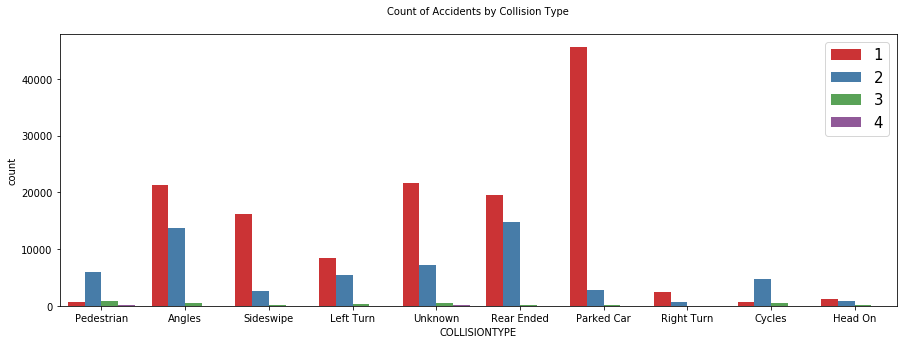

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(x='COLLISIONTYPE', hue='SEVERITYCODE', data=df1, palette="Set1")
plt.title('Count of Accidents by Collision Type', size=10, y=1.05)
plt.legend(loc='best', prop={'size': 15})
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

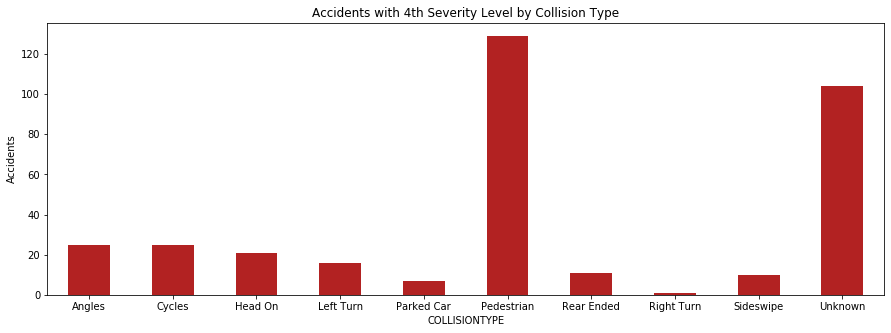

In [35]:
Types = df1.groupby(['COLLISIONTYPE','SEVERITYCODE'])[['COLLISIONTYPE']].count().rename(columns={'COLLISIONTYPE': 'Count'})
Types.reset_index(level=1, inplace=True)
# Types[['Count']].loc[Types['SEVERITYCODE']==4].head(15)
Types['Count'].loc[Types['SEVERITYCODE']==4].plot(kind='bar', figsize=(15,5), color=('firebrick'))
plt.title('Accidents with 4th Severity Level by Collision Type')
plt.ylabel('Accidents')
plt.xticks(rotation=360)


### INDCTTM
Firstly, the time and date format must be changed and separated


In [36]:
# Convert INCDTTM to date type

df1['INCDTTM'] = pd.to_datetime(df1['INCDTTM'], errors='coerce')

# Extract month, weekday, hour information

df1['Month']=df1['INCDTTM'].dt.month
df1['Weekday']=df1['INCDTTM'].dt.weekday
df1['Hour']=df1['INCDTTM'].dt.hour

In [37]:
df1.loc[:,['INCDTTM','Month','Weekday','Hour']].head()

INCDTTM  Month  Weekday  Hour
0 2019-11-20 10:25:00     11        2    10
1 2019-11-18 17:01:00     11        0    17
2 2020-02-20 08:42:00      2        3     8
3 2004-06-08 00:00:00      6        1     0
6 2019-06-16 01:07:00      6        6     1

#### Accidents by Month

In [38]:
df1['Month'].value_counts()

10    18080
6     17329
5     17311
7     17062
11    16871
8     16784
1     16735
3     16493
4     16283
9     16147
12    15796
2     14739
Name: Month, dtype: int64

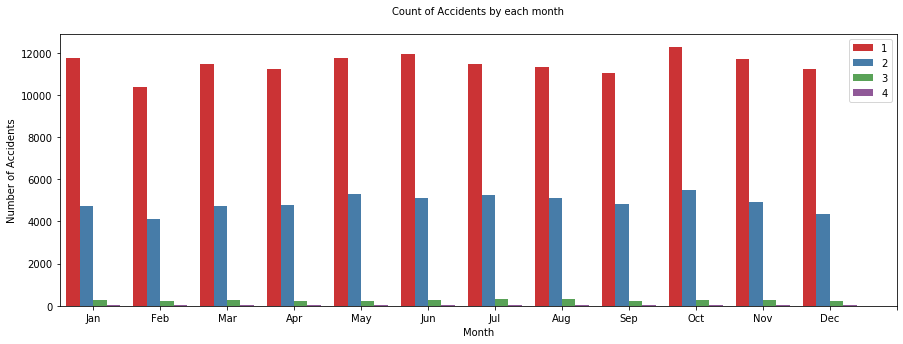

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(x='Month', hue='SEVERITYCODE', data=df1, palette="Set1")
Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(np.arange(0, 13, step=1),Months)
plt.title('Count of Accidents by each month', size=10, y=1.05)
plt.ylabel('Number of Accidents')
plt.legend(loc='best', prop={'size': 10})
plt.show()

#### Accidents by Day 


In [40]:
df1['Weekday'].value_counts()

4    33148
3    30121
2    29484
1    29271
5    28044
0    27019
6    22543
Name: Weekday, dtype: int64

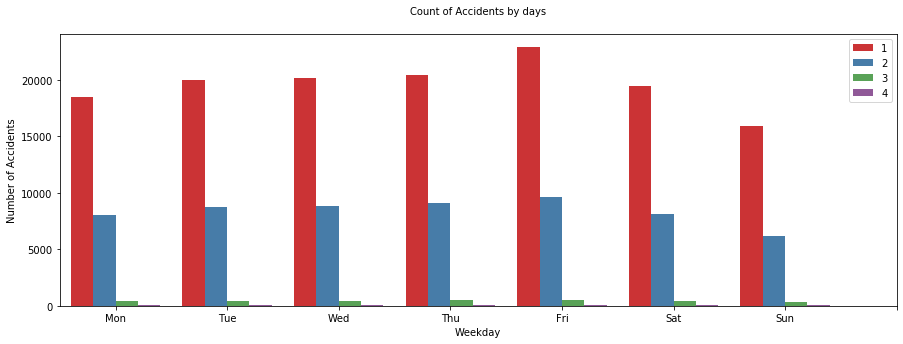

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(x='Weekday', hue='SEVERITYCODE', data=df1, palette="Set1")
Months = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.xticks(np.arange(0, 8, step=1),Months)
plt.title('Count of Accidents by days', size=10, y=1.05)
plt.ylabel('Number of Accidents')
plt.legend(loc='best', prop={'size': 10})
plt.show()

### Accidents by Hour 

In [42]:
df1['Hour'].value_counts()

0     34900
17    13319
16    12447
15    11827
14    10888
12    10653
13    10468
18    10044
8      8766
11     8391
9      8246
10     7648
19     7444
7      6729
20     6428
21     5771
22     5610
23     4749
2      3722
1      3540
6      3316
3      1730
5      1721
4      1273
Name: Hour, dtype: int64

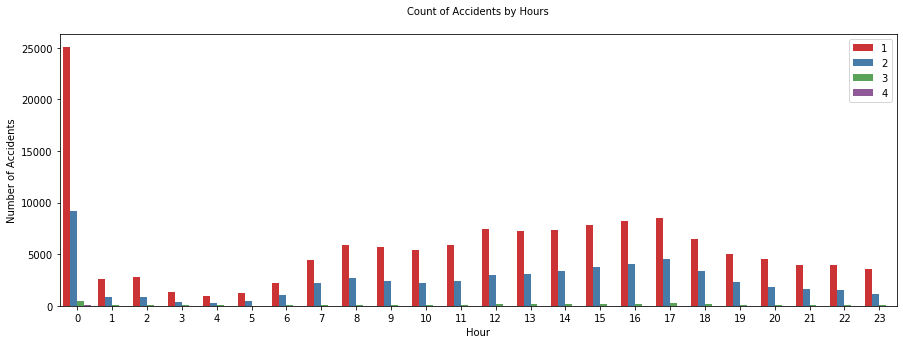

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(x='Hour', hue='SEVERITYCODE', data=df1, palette="Set1")
plt.title('Count of Accidents by Hours', size=10, y=1.05)
plt.ylabel('Number of Accidents')
plt.legend(loc='best', prop={'size': 10})
plt.show()

### Junction Type

Examining the number of missing or unknown values   

In [44]:
df1['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              91987
At Intersection (intersection related)               65041
Mid-Block (but intersection related)                 23069
Driveway Junction                                    10850
At Intersection (but not related to intersection)     2128
Ramp Junction                                          171
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [45]:
df1['JUNCTIONTYPE'].isna().sum()

6375

Combining those values to Unknown

In [46]:
df1.replace({'JUNCTIONTYPE' : {np.nan : 'Unknown'}}, inplace=True)

In [47]:
df1['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              91987
At Intersection (intersection related)               65041
Mid-Block (but intersection related)                 23069
Driveway Junction                                    10850
Unknown                                               6384
At Intersection (but not related to intersection)     2128
Ramp Junction                                          171
Name: JUNCTIONTYPE, dtype: int64

Changing the name of values to shorter ones 

In [48]:
df1.replace({'JUNCTIONTYPE' : {'Mid-Block (not related to intersection)': 'Mid-Block (Not Intersect)', 
                              'At Intersection (intersection related)': 'At Intersection (Intersect)',
                              'Mid-Block (but intersection related)': 'Mid-Block (Intersect)',
                              'At Intersection (but not related to intersection)': 'At Intersection (Intersect)'}}, inplace=True)

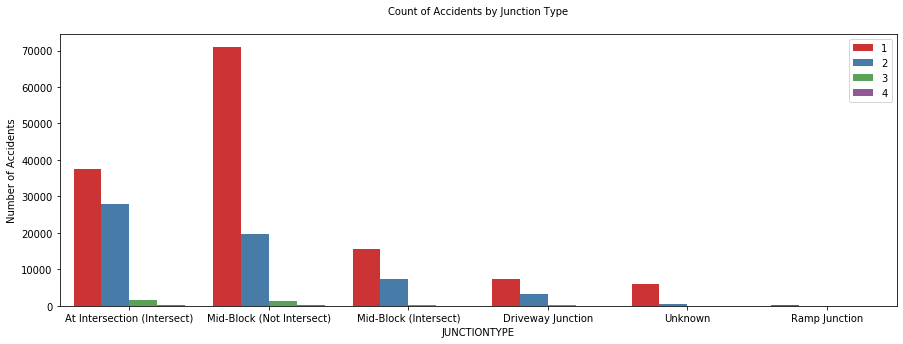

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(x='JUNCTIONTYPE', hue='SEVERITYCODE', data=df1, palette="Set1")
plt.title('Count of Accidents by Junction Type', size=10, y=1.05)
plt.ylabel('Number of Accidents')
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

### State's Collision Code, ST_COLCODE

In [50]:
df1.replace({'ST_COLCODE' : {' ' : 'Unknown'}}, inplace=True)
df1.replace({'ST_COLCODE' : {np.nan : 'Unknown'}}, inplace=True)

In [51]:
df1_St_colcode = df1.loc[df1['ST_COLCODE'] != 'Unknown']

In [52]:
pd.to_numeric(df1_St_colcode['ST_COLCODE']).value_counts(bins=15)

(5.867, 11.733]     48765
(29.333, 35.2]      46254
(11.733, 17.6]      42537
(46.933, 52.8]      15457
(23.467, 29.333]    13076
(17.6, 23.467]      12171
(-0.089, 5.867]      8129
(41.067, 46.933]     5097
(70.4, 76.267]       1783
(76.267, 82.133]      873
(82.133, 88.0]        192
(52.8, 58.667]        184
(35.2, 41.067]        165
(58.667, 64.533]       51
(64.533, 70.4]         31
Name: ST_COLCODE, dtype: int64

D:\Programs\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
D:\Programs\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
D:\Programs\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
D:\Programs\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 a

([<matplotlib.axis.XTick at 0x153aa3f7b08>,
 <a list of 18 Text xticklabel objects>)

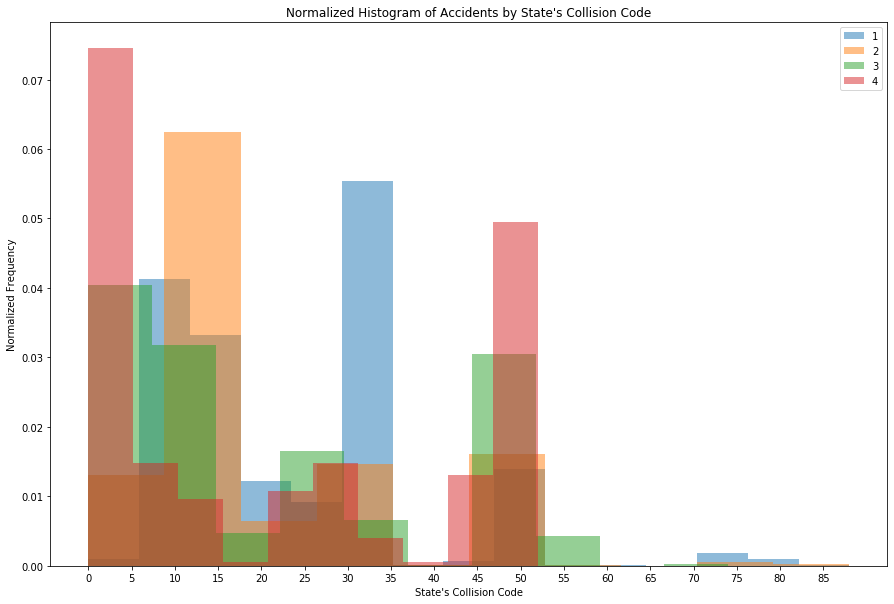

In [53]:
df_hist = df1_St_colcode.loc[:,['SEVERITYCODE','ST_COLCODE']]
df_hist.head()
pd.to_numeric(df_hist['ST_COLCODE'].loc[df_hist['SEVERITYCODE']==1]).plot(kind='hist',alpha=0.5, 
                                                                          stacked=False,
                                                                          normed=True,
                                                                          figsize=(15,10),
                                                                          label='1',
                                                                          bins=15)
pd.to_numeric(df_hist['ST_COLCODE'].loc[df_hist['SEVERITYCODE']==2]).plot(kind='hist',
                                                                          alpha=0.5,
                                                                          stacked=False,
                                                                          normed=True,
                                                                          label='2')
pd.to_numeric(df_hist['ST_COLCODE'].loc[df_hist['SEVERITYCODE']==3]).plot(kind='hist',
                                                                          alpha=0.5,
                                                                          stacked=False,
                                                                          normed=True,
                                                                          label='3')
pd.to_numeric(df_hist['ST_COLCODE'].loc[df_hist['SEVERITYCODE']==4]).plot(kind='hist',
                                                                          alpha=0.5,
                                                                          stacked=False,
                                                                          normed=True,
                                                                          label='4')
plt.title("Normalized Histogram of Accidents by State's Collision Code")
plt.xlabel("State's Collision Code")
plt.ylabel("Normalized Frequency")
plt.legend()
plt.xticks(np.arange(0, 90, 5))

In [54]:
df_codes = df1_St_colcode.groupby(['ST_COLCODE','SEVERITYCODE'])[['ST_COLCODE']].count().rename(columns={'ST_COLCODE': 'Count'})
df_codes.reset_index(inplace=True)

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Programs\Anaconda\lib\site-packages\ipykernel_launc

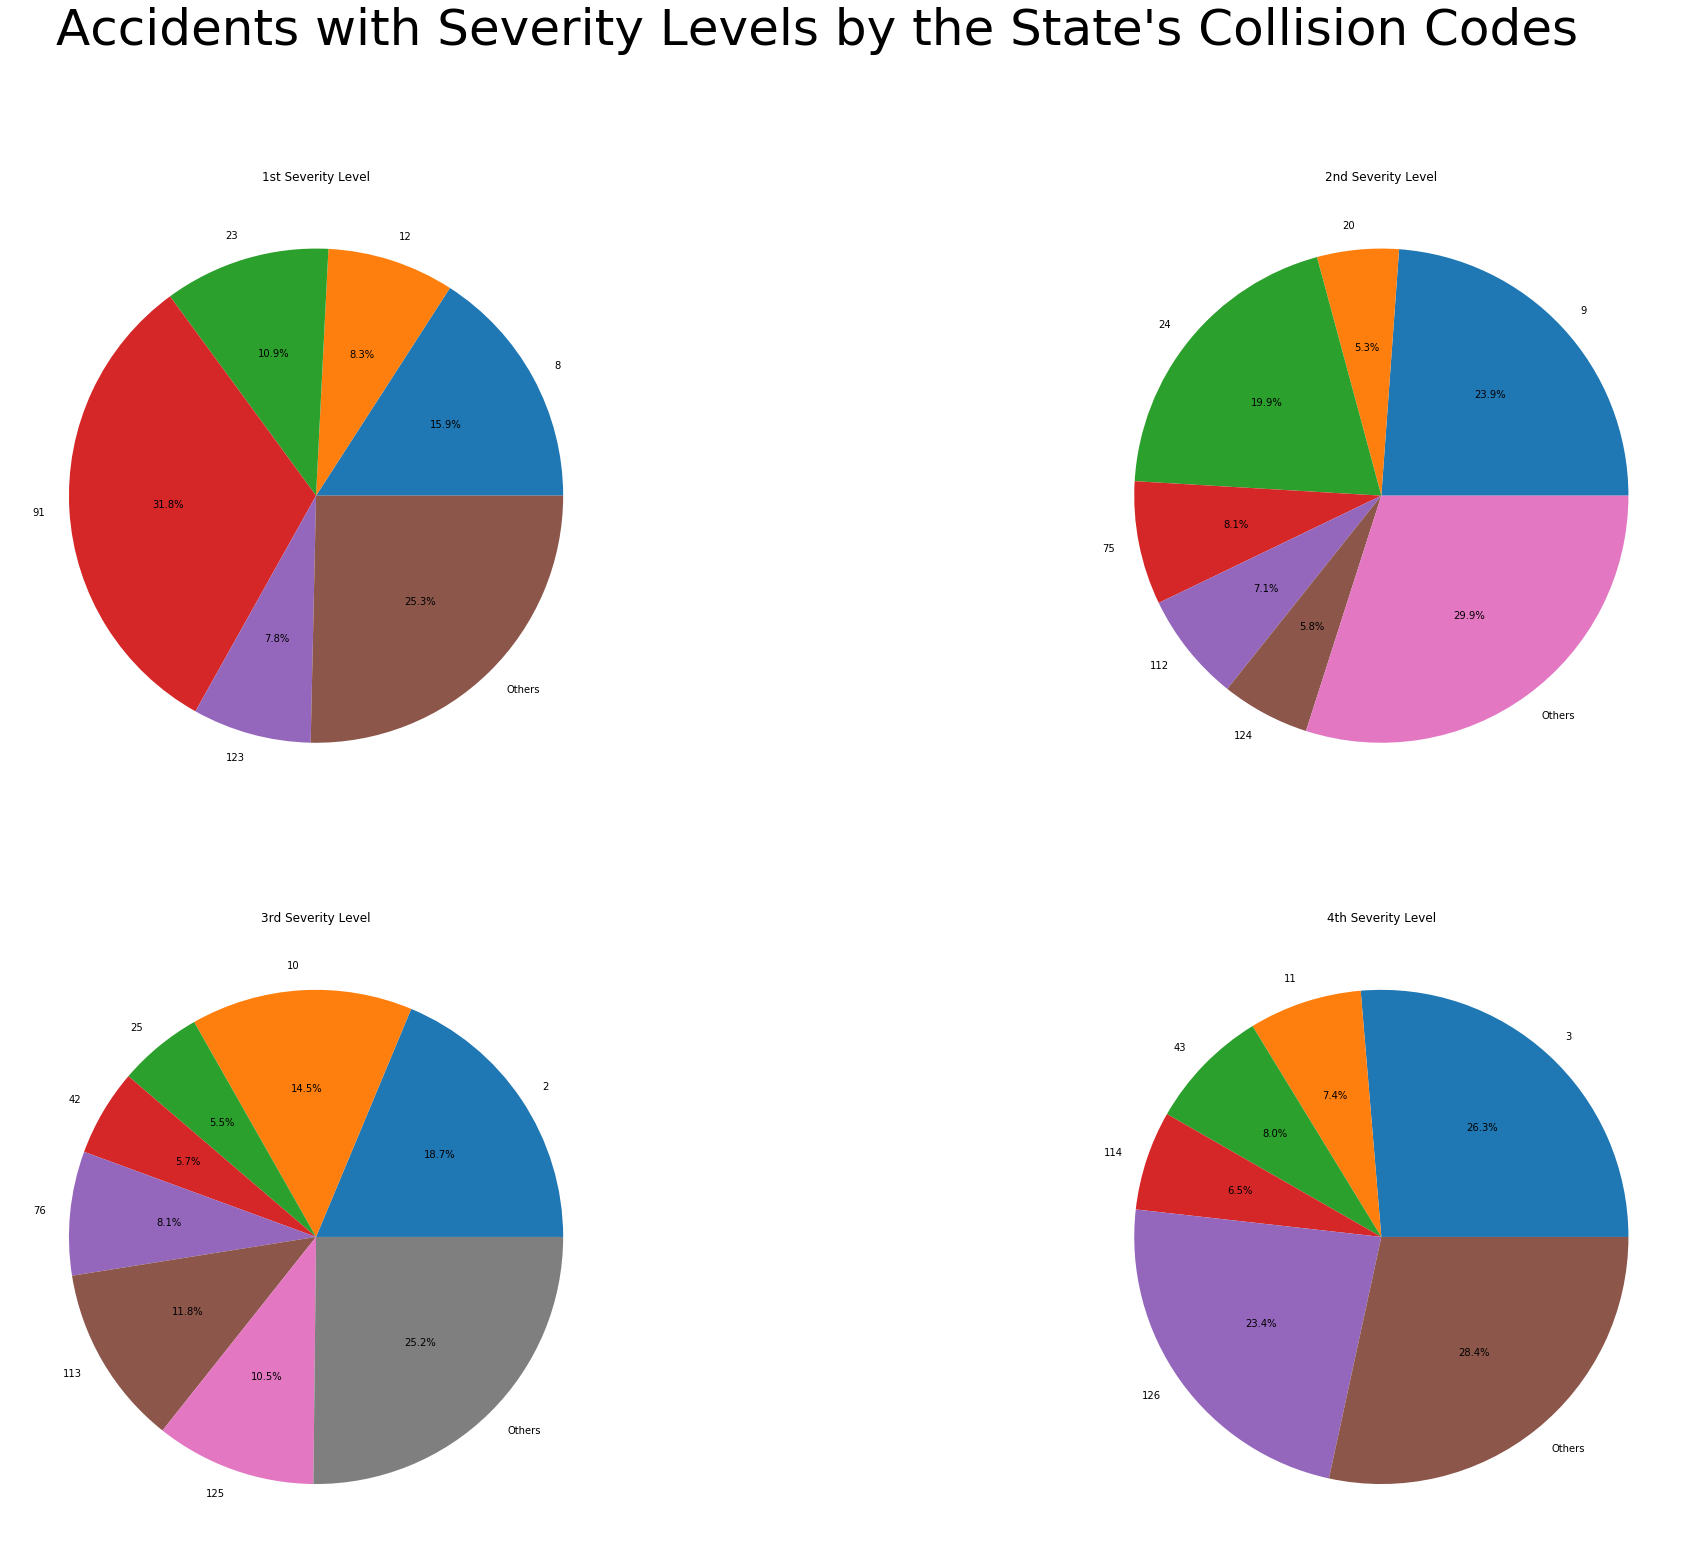

In [55]:
#Creating a figure with subplots
fig = plt.figure(figsize=(35,25))
ax1 = fig.add_subplot(221)    
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# 1st subplot
df_codes1= df_codes.loc[:,['ST_COLCODE','Count']].loc[df_codes['SEVERITYCODE']==1]
df_subset1 = df_codes1[df_codes1['Count']/df_codes1['Count'].sum()*100 > 5]
df_subset1.loc['Others','Count'] = df_codes1['Count'].sum()- df_subset1['Count'].sum()
df_subset1.plot.pie(y='Count',autopct='%1.1f%%', ax=ax1)
ax1.set_ylabel('')
ax1.set_title('1st Severity Level')
ax1.get_legend().remove()

# 2nd subplot
df_codes2= df_codes.loc[:,['ST_COLCODE','Count']].loc[df_codes['SEVERITYCODE']==2]
df_subset2 = df_codes2[df_codes2['Count']/df_codes2['Count'].sum()*100 > 5]
df_subset2.loc['Others','Count'] = df_codes2['Count'].sum()- df_subset2['Count'].sum()
df_subset2.plot.pie(y='Count',autopct='%1.1f%%', ax=ax2)
ax2.set_ylabel('')
ax2.set_title('2nd Severity Level')
ax2.get_legend().remove()

# 3rd subplot
df_codes3= df_codes.loc[:,['ST_COLCODE','Count']].loc[df_codes['SEVERITYCODE']==3]
df_subset3 = df_codes3[df_codes3['Count']/df_codes3['Count'].sum()*100 > 5]
df_subset3.loc['Others','Count'] = df_codes3['Count'].sum()- df_subset3['Count'].sum()
df_subset3.plot.pie(y='Count',autopct='%1.1f%%', ax=ax3)
ax3.set_ylabel('')
ax3.set_title('3rd Severity Level')
ax3.get_legend().remove()

# 4th subplot
df_codes4= df_codes.loc[:,['ST_COLCODE','Count']].loc[df_codes['SEVERITYCODE']==4]
df_subset4 = df_codes4[df_codes4['Count']/df_codes4['Count'].sum()*100 > 5]
df_subset4.loc['Others','Count'] = df_codes4['Count'].sum()- df_subset4['Count'].sum()
df_subset4.plot.pie(y='Count',autopct='%1.1f%%', ax=ax4)
ax4.set_ylabel('')
ax4.set_title('4th Severity Level')
ax4.get_legend().remove()

fig.suptitle("Accidents with Severity Levels by the State's Collision Codes", size=50)
plt.show()

### Inattention 

The percantage of missing data is almost all of the data. As shown below, a lot of observations have no data about this feature

In [56]:
(df1['INATTENTIONIND'].isna().sum()/(df1['INATTENTIONIND'].count()+df1['INATTENTIONIND'].isna().sum()))*100

84.87802434503831

In [57]:
df['INATTENTIONIND'].isna().sum()

191078

In [58]:
df['INATTENTIONIND'].value_counts()

Y    30188
Name: INATTENTIONIND, dtype: int64

### Under Influence of Substance 

In [59]:
(df1['UNDERINFL'].isna().sum()/(df1['UNDERINFL'].count()+df1['UNDERINFL'].isna().sum()))*100

2.42698993137304

In [60]:
df['UNDERINFL'].value_counts()

N    103482
0     81676
Y      5399
1      4230
Name: UNDERINFL, dtype: int64

In [61]:
df1.replace({'UNDERINFL' : {np.nan : 'Unknown'}}, inplace=True)
df1.replace({'UNDERINFL' : {'0' : 'N'}}, inplace=True)
df1.replace({'UNDERINFL' : {'1' : 'Y'}}, inplace=True)

In [62]:
df1['UNDERINFL'].value_counts()

N          185156
Y            9629
Unknown      4845
Name: UNDERINFL, dtype: int64

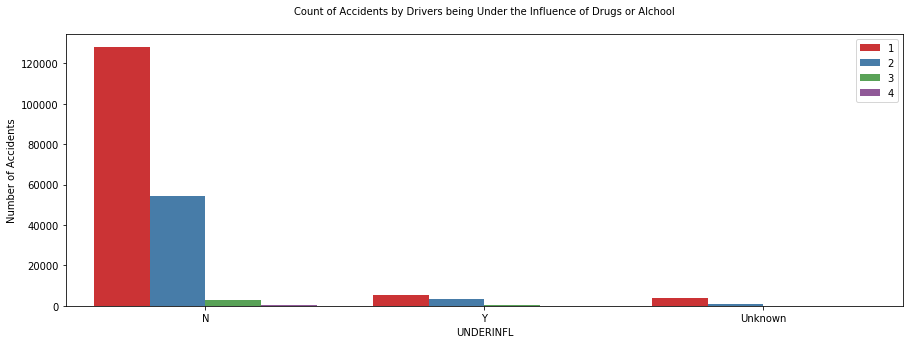

In [63]:
plt.figure(figsize=(15,5))
sns.countplot(x='UNDERINFL', hue='SEVERITYCODE', data=df1, palette="Set1")
plt.title('Count of Accidents by Drivers being Under the Influence of Drugs or Alchool', size=10, y=1.05)
plt.ylabel('Number of Accidents')
# plt.xticks( rotation= 45)
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

### Weather 

The percantage of missing data is almost half of the data. As shown below, 50% of observations have no data about this feature

In [64]:
(df1['WEATHER'].isna().sum()/(df1['WEATHER'].count()+df1['WEATHER'].isna().sum()))*100

2.532184541401593

In [65]:
df1['WEATHER'].value_counts()

Clear                       114360
Raining                      34020
Overcast                     28507
Unknown                      15131
Snowing                        919
Other                          853
Fog/Smog/Smoke                 577
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               56
Severe Crosswind                26
Partly Cloudy                    9
Blowing Snow                     1
Name: WEATHER, dtype: int64

In [66]:
df1.replace({'WEATHER' : {np.nan : 'Unknown'}}, inplace=True)
df1.replace({'WEATHER' : {'Other' : 'Unknown'}}, inplace=True)

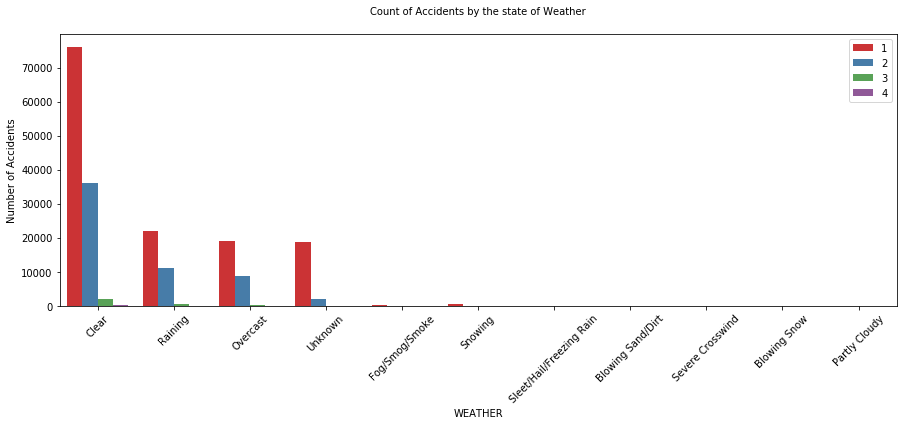

In [67]:
plt.figure(figsize=(15,5))
sns.countplot(x='WEATHER', hue='SEVERITYCODE', data=df1, palette="Set1")
plt.title('Count of Accidents by the state of Weather', size=10, y=1.05)
plt.ylabel('Number of Accidents')
plt.xticks( rotation= 45)
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

Text(0, 0.5, 'Number of Accidents')

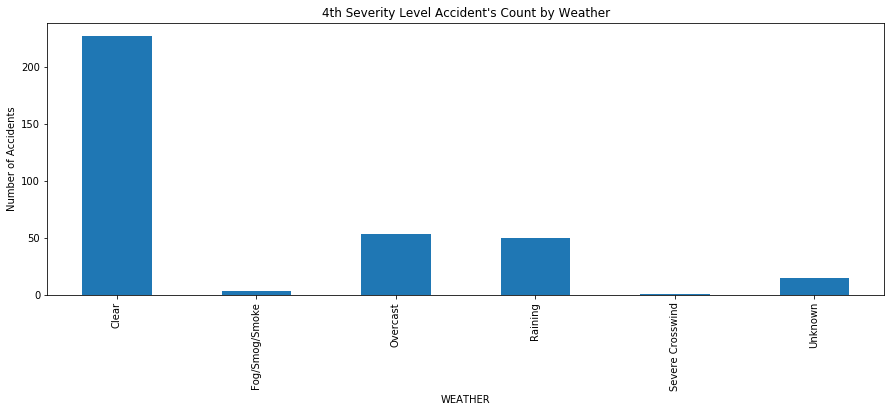

In [68]:
weather = df1.groupby(['WEATHER', 'SEVERITYCODE'])[['WEATHER']].count().reset_index(level=1).rename(columns={'WEATHER':'Count'})
weather['Count'].loc[weather['SEVERITYCODE']==4].plot(kind='bar',figsize=(15,5))
plt.title("4th Severity Level Accident's Count by Weather")
plt.ylabel('Number of Accidents')

### Road Condition 

In [69]:
(df1['ROADCOND'].isna().sum()/(df1['ROADCOND'].count()+df1['ROADCOND'].isna().sum()))*100

2.4921104042478586

In [70]:
df1.replace({'ROADCOND' : {np.nan : 'Unknown'}}, inplace=True)
df1.replace({'ROADCOND' : {'Other' : 'Unknown'}}, inplace=True)

In [71]:
df1['ROADCOND'].value_counts()

Dry               128171
Wet                48712
Unknown            20242
Ice                 1231
Snow/Slush          1014
Standing Water       119
Sand/Mud/Dirt         77
Oil                   64
Name: ROADCOND, dtype: int64

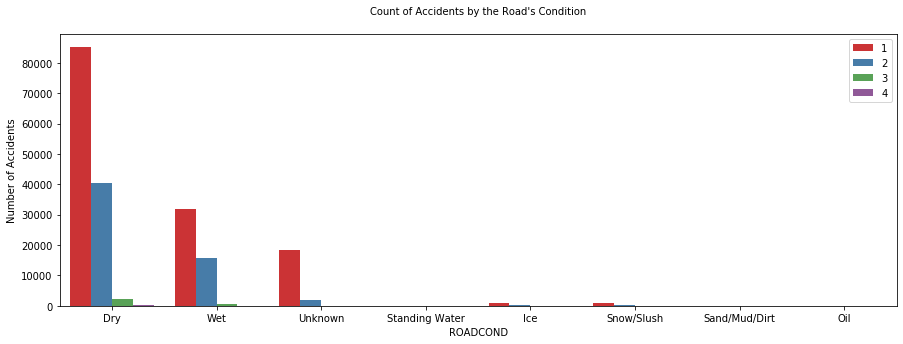

In [72]:
plt.figure(figsize=(15,5))
sns.countplot(x='ROADCOND', hue='SEVERITYCODE', data=df1, palette="Set1")
plt.title("Count of Accidents by the Road's Condition", size=10, y=1.05)
plt.ylabel('Number of Accidents')
# plt.xticks( rotation= 45)
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

### Light Condition

In [73]:
(df1['LIGHTCOND'].isna().sum()/(df1['LIGHTCOND'].count()+df1['LIGHTCOND'].isna().sum()))*100

2.576266092270701

In [74]:
df1.replace({'LIGHTCOND' : {np.nan : 'Unknown'}}, inplace=True)
df1.replace({'LIGHTCOND' : {'Other' : 'Unknown'}}, inplace=True)

In [75]:
df1['LIGHTCOND'].value_counts()

Daylight                    119163
Dark - Street Lights On      50053
Unknown                      18910
Dusk                          6076
Dawn                          2599
Dark - No Street Lights       1573
Dark - Street Lights Off      1236
Dark - Unknown Lighting         20
Name: LIGHTCOND, dtype: int64

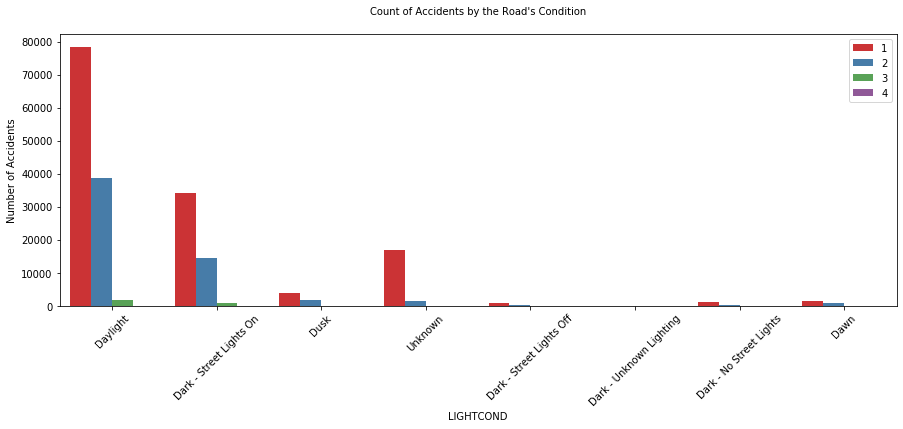

In [76]:
plt.figure(figsize=(15,5))
sns.countplot(x='LIGHTCOND', hue='SEVERITYCODE', data=df1, palette="Set1")
plt.title("Count of Accidents by the Road's Condition", size=10, y=1.05)
plt.ylabel('Number of Accidents')
plt.xticks( rotation= 45)
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

In [77]:
df1.dtypes

X                        float64
Y                        float64
SEVERITYCODE               int64
COLLISIONTYPE             object
INCDTTM           datetime64[ns]
JUNCTIONTYPE              object
ST_COLCODE                object
SDOT_COLCODE             float64
INATTENTIONIND            object
UNDERINFL                 object
WEATHER                   object
ROADCOND                  object
LIGHTCOND                 object
PEDROWNOTGRNT             object
SPEEDING                  object
HITPARKEDCAR              object
Month                      int64
Weekday                    int64
Hour                       int64
dtype: object

### Pedestrain Walk Right Granted 

The percantage of missing data is almost all of the data. As shown below, a lot of observations have no data about this feature

In [78]:
(df1['PEDROWNOTGRNT'].isna().sum()/(df1['PEDROWNOTGRNT'].count()+df1['PEDROWNOTGRNT'].isna().sum()))*100

97.40169313229474

### Speeding Factor

The percantage of missing data is almost all of the data. As shown below, a lot of observations have no data about this feature

In [79]:
(df1['SPEEDING'].isna().sum()/(df1['SPEEDING'].count()+df1['SPEEDING'].isna().sum()))*100

95.0348144066523

### Hitting a Parked Car

In [80]:
(df1['HITPARKEDCAR'].isna().sum()/(df1['HITPARKEDCAR'].count()+df1['HITPARKEDCAR'].isna().sum()))*100

0.0

In [81]:
df['HITPARKEDCAR'].value_counts()

N    209290
Y     11976
Name: HITPARKEDCAR, dtype: int64

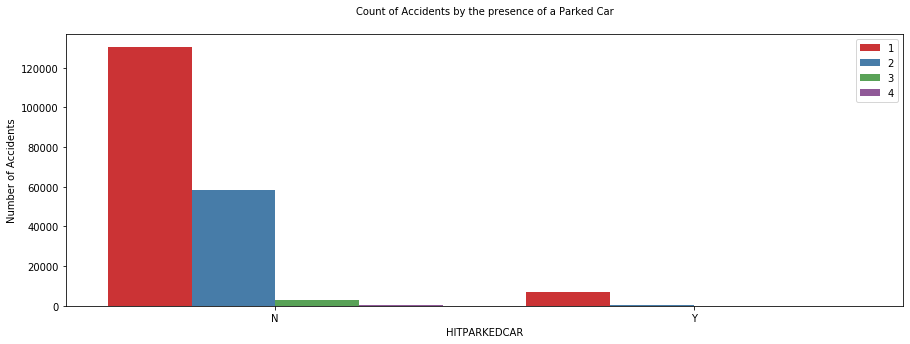

In [82]:
plt.figure(figsize=(15,5))
sns.countplot(x='HITPARKEDCAR', hue='SEVERITYCODE', data=df1, palette="Set1")
plt.title("Count of Accidents by the presence of a Parked Car", size=10, y=1.05)
plt.ylabel('Number of Accidents')
# plt.xticks( rotation= 45)
plt.legend(loc='upper right', prop={'size': 10})
plt.show()

# 4.DATA PREPARATION <a class="anchor" id="chapter4"></a>

Althoug the EDA invloved some necessary intial data processing, there are many steps required to wrangle the data and prepare it for model development.

## 4.1.Dealing with Missing Data  <a class="anchor" id="section_4_1"></a>

In [83]:
# all_count.clear()
# nan_count.clear()
# prcnt.clear()
all_count = []
nan_count = []
prcnt = []
k = 0
for i in df1.columns: 
    all_count.append(df1[i].count() + df1[i].isna().sum() + df1[i].loc[df1[i]=='Unknown'].count())
    nan_count.append(df1[i].isna().sum() + df1[i].loc[df1[i]=='Unknown'].count())
    prcnt.append(round(nan_count[k]/all_count[k]*100,4))
    k += 1
    
miss_dict = {'Feature':df1.columns, 
             'Total Data Number':all_count,
             'Missing Data Number':nan_count, 
             'Percentage of Missing Data': prcnt}

D:\Programs\Anaconda\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [84]:
miss_df = pd.DataFrame.from_dict(miss_dict)
miss_df.sort_values('Percentage of Missing Data',ascending=False,inplace=False)

Feature  Total Data Number  Missing Data Number  \
13   PEDROWNOTGRNT             199630               194443   
14        SPEEDING             199630               189718   
8   INATTENTIONIND             199630               169442   
3    COLLISIONTYPE             229023                29393   
10         WEATHER             220669                21039   
11        ROADCOND             219872                20242   
12       LIGHTCOND             218540                18910   
5     JUNCTIONTYPE             206014                 6384   
0                X             199630                 5402   
1                Y             199630                 5402   
6       ST_COLCODE             204495                 4865   
9        UNDERINFL             204475                 4845   
7     SDOT_COLCODE             199630                    0   
4          INCDTTM             199630                    0   
2     SEVERITYCODE             199630                    0   
15    HITPARKEDCAR             199630                    0   
16           Month             199630                    0   
17         Weekday             199630                    0   
18            Hour             199630                    0   

    Percentage of Missing Data  
13                     97.4017  
14                     95.0348  
8                      84.8780  
3                      12.8341  
10                      9.5342  
11                      9.2063  
12                      8.6529  
5                       3.0988  
0                       2.7060  
1                       2.7060  
6                       2.3790  
9                       2.3695  
7                       0.0000  
4                       0.0000  
2                       0.0000  
15                      0.0000  
16                      0.0000  
17                      0.0000  
18                      0.0000

### Features with Majority of the Data Missing 

In [85]:
miss_df.loc[:,['Feature','Percentage of Missing Data']].loc[miss_df['Percentage of Missing Data']>25]

Feature  Percentage of Missing Data
8   INATTENTIONIND                     84.8780
13   PEDROWNOTGRNT                     97.4017
14        SPEEDING                     95.0348

In [86]:
df1.head()

X          Y  SEVERITYCODE COLLISIONTYPE             INCDTTM  \
0 -122.386772  47.564720             2    Pedestrian 2019-11-20 10:25:00   
1 -122.341806  47.686934             2        Angles 2019-11-18 17:01:00   
2 -122.374899  47.668666             1     Sideswipe 2020-02-20 08:42:00   
3 -122.300758  47.683047             1     Left Turn 2004-06-08 00:00:00   
6 -122.323569  47.722577             1       Unknown 2019-06-16 01:07:00   

                  JUNCTIONTYPE ST_COLCODE  SDOT_COLCODE INATTENTIONIND  \
0  At Intersection (Intersect)          2          24.0            NaN   
1  At Intersection (Intersect)         10          11.0            NaN   
2    Mid-Block (Not Intersect)         11          14.0            NaN   
3  At Intersection (Intersect)         28          11.0            NaN   
6    Mid-Block (Not Intersect)         50          28.0            NaN   

  UNDERINFL  WEATHER ROADCOND                LIGHTCOND PEDROWNOTGRNT SPEEDING  \
0         N    Clear      Dry                 Daylight             Y      NaN   
1         N  Raining      Wet  Dark - Street Lights On           NaN      NaN   
2         N    Clear      Dry                 Daylight           NaN      NaN   
3         N  Raining      Wet  Dark - Street Lights On           NaN      NaN   
6         N    Clear      Dry  Dark - Street Lights On           NaN      NaN   

  HITPARKEDCAR  Month  Weekday  Hour  
0            N     11        2    10  
1            N     11        0    17  
2            N      2        3     8  
3            N      6        1     0  
6            N      6        6     1

In [87]:
df2 = df1 
df2.drop(columns=['INATTENTIONIND','PEDROWNOTGRNT','SPEEDING'],inplace=True)

### Features with Small or Low Precentage of Missing Data 

Missing data could be either processed by the folowwing: 
+ **Removing rows containing missing data** \
This could affect the accuracy of the out-of-sample prediction since there are other present data about the other features.
+ **Replacing data** \
The data can be replaced by the most frequent, mean, or the median value in the feature's data. However, when the percentage of missing data is around 10%, the model might develop bias towards these values. 

Since the data is large and the removal of certain rows might reduce the percentage in more than one feature, all rows with missing values will be removed. Additionally, This decision is prefered since it will not lead to biased or unbalanced data.  

The X and Y coordinates are removed since they do not contribute in predicting the severity level 

In [88]:
df2.drop(columns=['X','Y'],inplace=True)

The INCDTTM feature is removed since it can be replaced by Month, Day, and Hour features. 

In [89]:
df2.drop(columns=['INCDTTM'],inplace=True)

Dropping accidents with the value of 'Unknown' in any of its features 

In [90]:
df2 = df2[df2.COLLISIONTYPE != 'Unknown']
df2 = df2[df2.JUNCTIONTYPE != 'Unknown']
df2 = df2[df2.ST_COLCODE != 'Unknown']
df2 = df2[df2.UNDERINFL != 'Unknown']
df2 = df2[df2.WEATHER != 'Unknown']
df2 = df2[df2.ROADCOND != 'Unknown']
df2 = df2[df2.LIGHTCOND != 'Unknown']

In [91]:
all_count2= []
nan_count2= []
prcnt2= []

all_count2.clear()
nan_count2.clear()
prcnt2.clear()
k = 0
for i in df2.columns: 
    all_count2.append(df2[i].count() + df2[i].isna().sum() + df2[i].loc[df2[i]=='Unknown'].count())
    nan_count2.append(df2[i].isna().sum() + df2[i].loc[df2[i]=='Unknown'].count())
    prcnt2.append(round(nan_count2[k]/all_count2[k]*100,4))
    k += 1
    
miss_dict2 = []    
miss_dict2.clear()    
miss_dict2 = {'Feature':df2.columns, 
             'Total Data Number':all_count2,
             'Missing Data Number':nan_count2, 
             'Percentage of Missing Data': prcnt2}

miss_df2 = pd.DataFrame.from_dict(miss_dict2)
miss_df2

D:\Programs\Anaconda\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Feature  Total Data Number  Missing Data Number  \
0    SEVERITYCODE             149502                    0   
1   COLLISIONTYPE             149502                    0   
2    JUNCTIONTYPE             149502                    0   
3      ST_COLCODE             149502                    0   
4    SDOT_COLCODE             149502                    0   
5       UNDERINFL             149502                    0   
6         WEATHER             149502                    0   
7        ROADCOND             149502                    0   
8       LIGHTCOND             149502                    0   
9    HITPARKEDCAR             149502                    0   
10          Month             149502                    0   
11        Weekday             149502                    0   
12           Hour             149502                    0   

    Percentage of Missing Data  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0  
5                          0.0  
6                          0.0  
7                          0.0  
8                          0.0  
9                          0.0  
10                         0.0  
11                         0.0  
12                         0.0

In [92]:
print('Original dataframe: df',df.shape)
print('Dataframe with the selected features: df1',df1.shape)
print('Dataframe with features containtin no missing data: df2',df2.shape)

Original dataframe: df (221266, 40)
Dataframe with the selected features: df1 (199630, 13)
Dataframe with features containtin no missing data: df2 (149502, 13)


In [93]:
df2.to_csv('df2.csv')

## 4.2.Processing the Data <a class="anchor" id="section_4_2"></a>

In [94]:
df2.head()

SEVERITYCODE COLLISIONTYPE                 JUNCTIONTYPE ST_COLCODE  \
0             2    Pedestrian  At Intersection (Intersect)          2   
1             2        Angles  At Intersection (Intersect)         10   
2             1     Sideswipe    Mid-Block (Not Intersect)         11   
3             1     Left Turn  At Intersection (Intersect)         28   
8             2    Pedestrian    Mid-Block (Not Intersect)          0   

   SDOT_COLCODE UNDERINFL  WEATHER ROADCOND                LIGHTCOND  \
0          24.0         N    Clear      Dry                 Daylight   
1          11.0         N  Raining      Wet  Dark - Street Lights On   
2          14.0         N    Clear      Dry                 Daylight   
3          11.0         N  Raining      Wet  Dark - Street Lights On   
8          24.0         N    Clear      Dry  Dark - Street Lights On   

  HITPARKEDCAR  Month  Weekday  Hour  
0            N     11        2    10  
1            N     11        0    17  
2            N      2        3     8  
3            N      6        1     0  
8            N     11        3    18

In [95]:
df2.columns

Index(['SEVERITYCODE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'ST_COLCODE',
       'SDOT_COLCODE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'HITPARKEDCAR', 'Month', 'Weekday', 'Hour'],
      dtype='object')

### Choosing the features to be one-hot encoded

Features with categorical values are one-hot encoded to train the model and perform out-of-sample testing.

In [96]:
to_be_dummies = ['COLLISIONTYPE', 'JUNCTIONTYPE','UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND','HITPARKEDCAR']

Due to the high number of observations, a sample of 10,000 observations is chosen to both train and test the model.

In [97]:
df_dm = pd.get_dummies(df2, columns=to_be_dummies, drop_first=True, dtype='int64')

df_dm = df_dm.head(10000)

In [98]:
df_dm

SEVERITYCODE ST_COLCODE  SDOT_COLCODE  Month  Weekday  Hour  \
0                 2          2          24.0     11        2    10   
1                 2         10          11.0     11        0    17   
2                 1         11          14.0      2        3     8   
3                 1         28          11.0      6        1     0   
8                 2          0          24.0     11        3    18   
...             ...        ...           ...    ...      ...   ...   
16129             1         32          11.0      5        1     0   
16130             1         32          11.0     11        0     0   
16131             1         28          11.0     10        1     7   
16132             2         10          11.0     10        1     1   
16134             1         13          14.0      3        1     0   

       COLLISIONTYPE_Cycles  COLLISIONTYPE_Head On  COLLISIONTYPE_Left Turn  \
0                         0                      0                        0   
1                         0                      0                        0   
2                         0                      0                        0   
3                         0                      0                        1   
8                         0                      0                        0   
...                     ...                    ...                      ...   
16129                     0                      0                        0   
16130                     0                      0                        0   
16131                     0                      0                        1   
16132                     0                      0                        0   
16134                     0                      0                        0   

       COLLISIONTYPE_Parked Car  ...  ROADCOND_Snow/Slush  \
0                             0  ...                    0   
1                             0  ...                    0   
2                             0  ...                    0   
3                             0  ...                    0   
8                             0  ...                    0   
...                         ...  ...                  ...   
16129                         1  ...                    0   
16130                         1  ...                    0   
16131                         0  ...                    0   
16132                         0  ...                    0   
16134                         0  ...                    0   

       ROADCOND_Standing Water  ROADCOND_Wet  \
0                            0             0   
1                            0             1   
2                            0             0   
3                            0             1   
8                            0             0   
...                        ...           ...   
16129                        0             0   
16130                        0             0   
16131                        0             1   
16132                        0             1   
16134                        0             0   

       LIGHTCOND_Dark - Street Lights Off  LIGHTCOND_Dark - Street Lights On  \
0                                       0                                  0   
1                                       0                                  1   
2                                       0                                  0   
3                                       0                                  1   
8                                       0                                  1   
...                                   ...                                ...   
16129                                   0                                  0   
16130                                   0                                  0   
16131                                   0                                  0   
16132                                   0                                  1   
16134                      

In [99]:
Y = df_dm['SEVERITYCODE']
X = df_dm.drop('SEVERITYCODE', axis=1)

In [100]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8000, 39) (8000,)
Test set: (2000, 39) (2000,)


Both the training and testing sets are standardized before developing the model

## 4.3.Balancing the Data Set <a class="anchor" id="section_4_3"></a>

The EDA shows that the predicted value (i.e. SEVERITYCODE) is not balanced and any model development based on this data set could lead to low accuracy and bias towards the calss having the majority. 

In [101]:
df_dm['SEVERITYCODE'].value_counts(normalize=False)

1    6446
2    3354
3     177
4      23
Name: SEVERITYCODE, dtype: int64

In [102]:
df_dm['SEVERITYCODE'].value_counts(normalize=True)

1    0.6446
2    0.3354
3    0.0177
4    0.0023
Name: SEVERITYCODE, dtype: float64

As observed, the data is skewed with the 4th level being less than 1% of the data. The model would have a terrible accuracy in predicting the true positive of 4th level severity level which is very costly. These false predictions are accidents with fatalities that were predicted to have property damage or any lower severity level.  

The data set can be balanced by either one of the following options: 
+ **Over-sampling**: Increasing the rate of rare occurences (i.e. 4th severity level)
        No information is lost but the model might be over-fitted. 
        
+ **Under-sampling**: Decreasing the rate of abundant occurences (i.e. 1st severity level)
        More information is lost but the run-time is enhanced.

+ **Both techniques**: Combining both over-sampling and under-sampling techniques.

Since the observations of the 4th class are very low and the majority classes are very high, both over-samping and under-sampling techniques are used. This is done through **Synthetic Minority Over-sampling Technique (SMOTE)** along with **Editted Nearest Neighbor (ENN)**.  

In [103]:
#Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import f1_score

In [104]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

combine = SMOTEENN(smote=SMOTE(k_neighbors=10),
                   sampling_strategy='minority',
                   enn=EditedNearestNeighbours(sampling_strategy='not minority'))

X_train_sm, y_train_sm = combine.fit_resample(X_train, y_train)

In [105]:
print ('Training set before SMOTEENN:', X_train.shape,  y_train.shape)
print ('Training set after SMOTEENN:', X_train_sm.shape,  y_train_sm.shape)

Training set before SMOTEENN: (8000, 39) (8000,)
Training set after SMOTEENN: (17213, 39) (17213,)


In [106]:
y_train.value_counts()

1    5170
2    2669
3     142
4      19
Name: SEVERITYCODE, dtype: int64

In [107]:
y_train_sm.value_counts()

1    5170
4    5150
3    4523
2    2370
Name: SEVERITYCODE, dtype: int64

In [108]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sm = scaler.fit(X_train_sm).transform(X_train_sm)
X_test= scaler.transform(X_test)

# 5.MODEL DEVELOPMENT <a class="anchor" id="chapter5"></a>

In [109]:
#Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import Supported Vector Machine (SVM) Classifier from sklearn
from sklearn import svm

## 5.1.Four Classes <a class="anchor" id="section_5_1"></a>

### Decision Tree Classifier

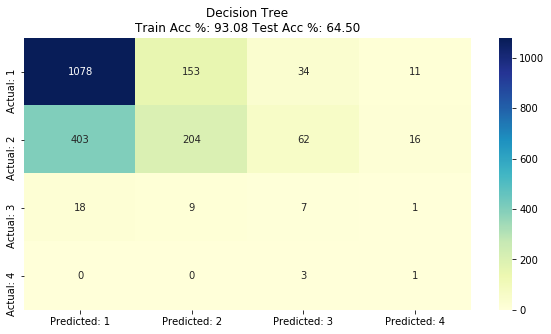

<Figure size 360x216 with 0 Axes>

              precision    recall  f1-score   support

           1      0.845     0.719     0.777      1499
           2      0.298     0.557     0.388       366
           3      0.200     0.066     0.099       106
           4      0.250     0.034     0.061        29

    accuracy                          0.645      2000
   macro avg      0.398     0.344     0.331      2000
weighted avg      0.702     0.645     0.659      2000



In [110]:
# ------------------------------------------------------------------------
# DECISION TREE
# ------------------------------------------------------------------------
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)  

DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 15)
DT_model.fit(X_train_sm,y_train_sm)

dt_y_pred = DT_model.predict(X_test)

dt_accuracy_train = DT_model.score(X_train_sm, y_train_sm)
dt_accuracy_test = DT_model.score(X_test,y_test)


DT_cm = confusion_matrix(y_true=y_test, y_pred=dt_y_pred)

DT_df_conf = pd.DataFrame(data=DT_cm, columns=['Predicted: 1','Predicted: 2','Predicted: 3','Predicted: 4'], 
                       index=['Actual: 1','Actual: 2', 'Actual: 3','Actual: 4'])

plt.figure(figsize = (5,3))
sns.heatmap(DT_df_conf, annot=True,fmt='d',cmap="YlGnBu", ax=ax1).set_title(
    "Decision Tree\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                dt_accuracy_train*100, dt_accuracy_test*100), fontsize=12)
plt.show()

print(metrics.classification_report(dt_y_pred, y_test, digits=3))

### Supported Vector Machine (SVM)

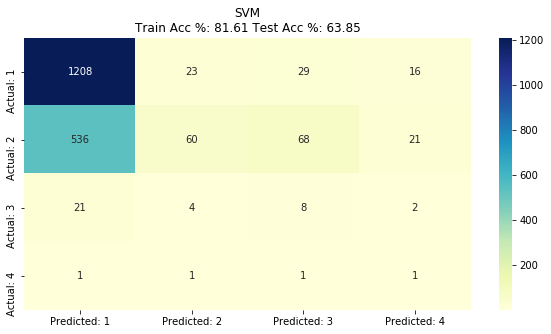

<Figure size 360x216 with 0 Axes>

              precision    recall  f1-score   support

           1      0.947     0.684     0.794      1766
           2      0.088     0.682     0.155        88
           3      0.229     0.075     0.113       106
           4      0.250     0.025     0.045        40

    accuracy                          0.638      2000
   macro avg      0.378     0.367     0.277      2000
weighted avg      0.857     0.638     0.715      2000



In [111]:
# ------------------------------------------------------------------------
# SUPPORTED VECTOR MACHINE (SVM)
# ------------------------------------------------------------------------
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)  

SVM_model = svm.SVC(decision_function_shape='ovo')
SVM_model.fit(X_train_sm, y_train_sm) 
SVM_model
SVM_y_pred = SVM_model.predict(X_test)

SVM_accuracy_train = SVM_model.score(X_train_sm, y_train_sm)
SVM_accuracy_test = SVM_model.score(X_test,y_test)

SVM_cm = confusion_matrix(y_true=y_test, y_pred=SVM_y_pred)

SVM_df_conf = pd.DataFrame(data=SVM_cm, columns=['Predicted: 1','Predicted: 2','Predicted: 3','Predicted: 4'], 
                       index=['Actual: 1','Actual: 2', 'Actual: 3','Actual: 4'])

plt.figure(figsize = (5,3))
sns.heatmap(SVM_df_conf, annot=True,fmt='d',cmap="YlGnBu", ax =ax1).set_title(
    "SVM\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                SVM_accuracy_train*100, SVM_accuracy_test*100), fontsize=12)
plt.show()

print(metrics.classification_report(SVM_y_pred, y_test, digits=3))

### Logistic Regression

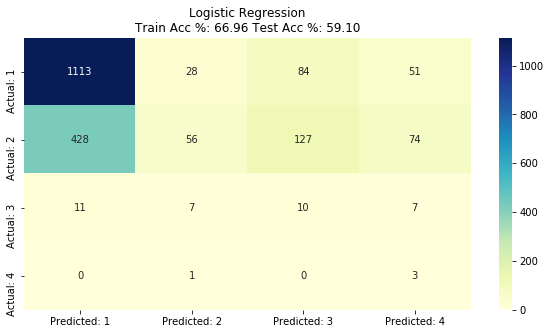

<Figure size 360x216 with 0 Axes>

              precision    recall  f1-score   support

           1      0.872     0.717     0.787      1552
           2      0.082     0.609     0.144        92
           3      0.286     0.045     0.078       221
           4      0.750     0.022     0.043       135

    accuracy                          0.591      2000
   macro avg      0.497     0.348     0.263      2000
weighted avg      0.763     0.591     0.629      2000



In [112]:
# ------------------------------------------------------------------------
# LOGISTIC REGRESSION
# ------------------------------------------------------------------------
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

LR_model = LogisticRegression(C=0.01, multi_class='auto').fit(X_train_sm,y_train_sm)

LR_y_pred = LR_model.predict(X_test)

LR_accuracy_train = LR_model.score(X_train_sm, y_train_sm)
LR_accuracy_test = LR_model.score(X_test,y_test)

LR_cm = confusion_matrix(y_true=y_test, y_pred=LR_y_pred)

LR_df_conf = pd.DataFrame(data=LR_cm, columns=['Predicted: 1','Predicted: 2','Predicted: 3','Predicted: 4'], 
                       index=['Actual: 1','Actual: 2', 'Actual: 3','Actual: 4'])

plt.figure(figsize = (5,3))
sns.heatmap(LR_df_conf, annot=True,fmt='d',cmap="YlGnBu", ax =ax1).set_title(
    "Logistic Regression\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                LR_accuracy_train*100, LR_accuracy_test*100), fontsize=12)
plt.show()

print(metrics.classification_report(LR_y_pred, y_test, digits=3))

### K-Nearest Neighbors (KNN)

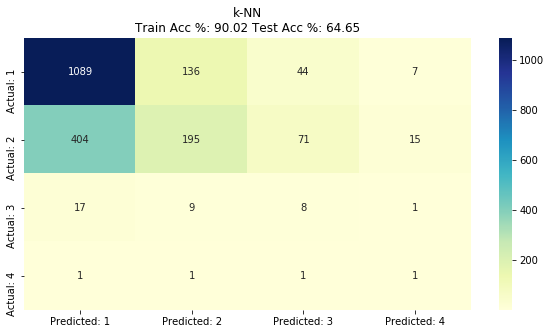

<Figure size 360x216 with 0 Axes>

              precision    recall  f1-score   support

           1      0.853     0.721     0.781      1511
           2      0.285     0.572     0.380       341
           3      0.229     0.065     0.101       124
           4      0.250     0.042     0.071        24

    accuracy                          0.646      2000
   macro avg      0.404     0.350     0.333      2000
weighted avg      0.710     0.646     0.662      2000



In [113]:
# ------------------------------------------------------------------------
# K-NEAREST NEIGHBOR (KNN)
# # ------------------------------------------------------------------------
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

kNN_model = KNeighborsClassifier(n_neighbors=7).fit(X_train_sm,y_train_sm)
knn_y_pred = kNN_model.predict(X_test)

knn_accuracy_train = kNN_model.score(X_train_sm, y_train_sm)
knn_accuracy_test = kNN_model.score(X_test,y_test)

knn_cm = confusion_matrix(y_true=y_test, y_pred=knn_y_pred)

knn_df_conf = pd.DataFrame(data=knn_cm, columns=['Predicted: 1','Predicted: 2','Predicted: 3','Predicted: 4'], 
                       index=['Actual: 1','Actual: 2', 'Actual: 3','Actual: 4'])

plt.figure(figsize = (5,3))
sns.heatmap(knn_df_conf, annot=True,fmt='d',cmap="YlGnBu", ax=ax1).set_title(
    "k-NN\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                knn_accuracy_train*100, knn_accuracy_test*100), fontsize=12)
plt.show()

print(metrics.classification_report(knn_y_pred, y_test, digits=3))

### All ML Confusion Matrices

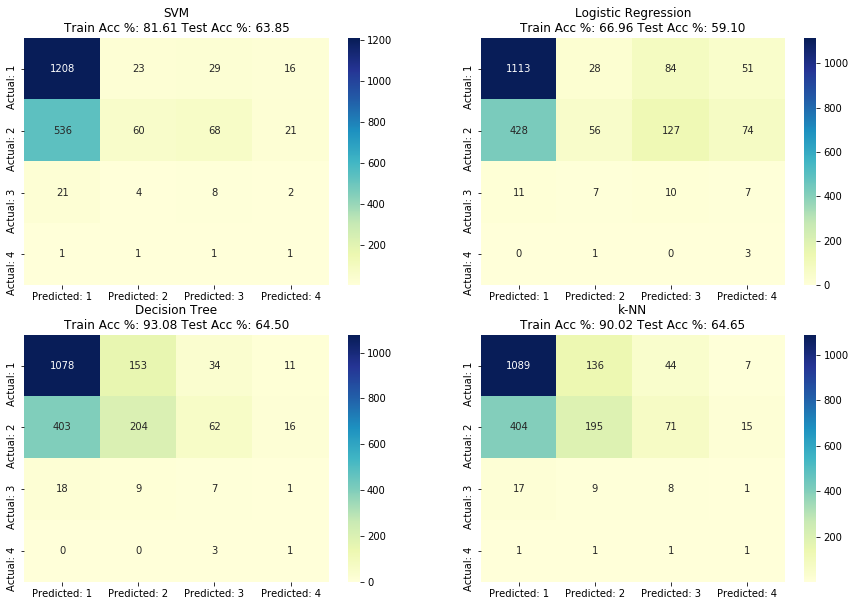

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

In [114]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(221)    
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# SUPPORTED VECTOR MACHINE (SVM)
plt.figure(figsize = (5,3))
sns.heatmap(SVM_df_conf, annot=True,fmt='d',cmap="YlGnBu", ax =ax1).set_title(
    "SVM\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                SVM_accuracy_train*100, SVM_accuracy_test*100), fontsize=12)

# ------------------------------------------------------------------------
# LOGISTIC REGRESSION
plt.figure(figsize = (5,3))
sns.heatmap(LR_df_conf, annot=True,fmt='d',cmap="YlGnBu", ax =ax2).set_title(
    "Logistic Regression\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                LR_accuracy_train*100, LR_accuracy_test*100), fontsize=12)

# ------------------------------------------------------------------------
# DECISION TREE
plt.figure(figsize = (5,3))
sns.heatmap(DT_df_conf, annot=True,fmt='d',cmap="YlGnBu", ax=ax3).set_title(
    "Decision Tree\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                dt_accuracy_train*100, dt_accuracy_test*100), fontsize=12)

# ------------------------------------------------------------------------
# K-NEAREST NEIGHBOR (KNN)
plt.figure(figsize = (5,3))
sns.heatmap(knn_df_conf, annot=True,fmt='d',cmap="YlGnBu", ax=ax4).set_title(
    "k-NN\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                knn_accuracy_train*100, knn_accuracy_test*100), fontsize=12)
plt.show()

Although the data was balanced and various ML models were used, the results show a maximum accuracy score of 65%. Additionally, both the recall and pricision of the 4th class are very low. Therefore, the classes were reduced to only two, not fatal and fatal with numbers of 1 and 2, respectively.  

## 5.2.Two Classes <a class="anchor" id="section_5_2"></a>

In [115]:
df_dm2 = df_dm

In [116]:
df_dm2['SEVERITYCODE'].dtypes

dtype('int64')

In [117]:
df_dm2.replace({'SEVERITYCODE' : {1:0, 2:0, 3:0}}, inplace=True)
df_dm2.replace({'SEVERITYCODE' : {4:1}}, inplace=True)

In [118]:
df_dm['SEVERITYCODE'].value_counts()

0    9977
1      23
Name: SEVERITYCODE, dtype: int64

In [119]:
Y = df_dm2['SEVERITYCODE']
X = df_dm2.drop('SEVERITYCODE', axis=1)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8000, 39) (8000,)
Test set: (2000, 39) (2000,)


In [121]:
combine = SMOTEENN(smote=SMOTE(k_neighbors=3),
                   sampling_strategy='minority',
                   enn=EditedNearestNeighbours(sampling_strategy='majority'))

X_train_sm, y_train_sm = combine.fit_resample(X_train, y_train)

In [122]:
print ('Training set before SMOTEENN:', X_train.shape,  y_train.shape)
print ('Training set after SMOTEENN:', X_train_sm.shape,  y_train_sm.shape)

Training set before SMOTEENN: (8000, 39) (8000,)
Training set after SMOTEENN: (15802, 39) (15802,)


In [123]:
y_train.value_counts()

0    7981
1      19
Name: SEVERITYCODE, dtype: int64

In [124]:
y_train_sm.value_counts()

1    7981
0    7821
Name: SEVERITYCODE, dtype: int64

In [125]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sm = scaler.fit(X_train_sm).transform(X_train_sm)
X_test= scaler.transform(X_test)

In [126]:
X_mega_test = scaler.transform(X)

### Decision Tree Classifier

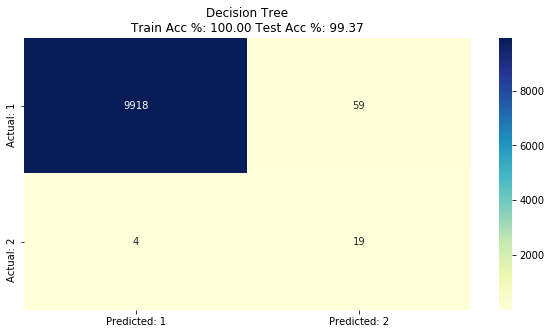

<Figure size 360x216 with 0 Axes>

              precision    recall  f1-score   support

           0      0.994     1.000     0.997      9922
           1      0.826     0.244     0.376        78

    accuracy                          0.994     10000
   macro avg      0.910     0.622     0.687     10000
weighted avg      0.993     0.994     0.992     10000



In [127]:
# ------------------------------------------------------------------------
# DECISION TREE
# ------------------------------------------------------------------------
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)  

DT_model = DecisionTreeClassifier(criterion="entropy")
DT_model.fit(X_train_sm,y_train_sm)

dt_y_pred = DT_model.predict(X_mega_test)

dt_accuracy_train = DT_model.score(X_train_sm, y_train_sm)
dt_accuracy_test = DT_model.score(X_mega_test,Y)


DT_cm = confusion_matrix(y_true=Y, y_pred=dt_y_pred)

DT_df_conf = pd.DataFrame(data=DT_cm, columns=['Predicted: 1','Predicted: 2'], 
                       index=['Actual: 1','Actual: 2'])

plt.figure(figsize = (5,3))
sns.heatmap(DT_df_conf, annot=True,fmt='d',cmap="YlGnBu", ax=ax1).set_title(
    "Decision Tree\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                dt_accuracy_train*100, dt_accuracy_test*100), fontsize=12)
plt.show()

print(metrics.classification_report(dt_y_pred, Y, digits=3))

### Supported Vector Machine (SVM)

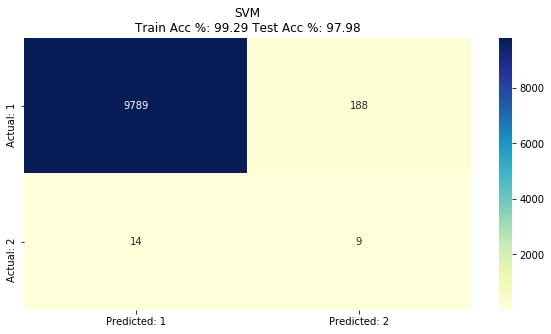

<Figure size 360x216 with 0 Axes>

              precision    recall  f1-score   support

           0      0.981     0.999     0.990      9803
           1      0.391     0.046     0.082       197

    accuracy                          0.980     10000
   macro avg      0.686     0.522     0.536     10000
weighted avg      0.970     0.980     0.972     10000



In [128]:
# ------------------------------------------------------------------------
# SUPPORTED VECTOR MACHINE (SVM)
# ------------------------------------------------------------------------
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)  

SVM_model = svm.SVC()
SVM_model.fit(X_train_sm, y_train_sm) 
SVM_model
SVM_y_pred = SVM_model.predict(X_mega_test)

SVM_accuracy_train = SVM_model.score(X_train_sm, y_train_sm)
SVM_accuracy_test = SVM_model.score(X_mega_test,Y)

SVM_cm = confusion_matrix(y_true=Y, y_pred=SVM_y_pred)

SVM_df_conf = pd.DataFrame(data=SVM_cm, columns=['Predicted: 1','Predicted: 2'],
                       index=['Actual: 1','Actual: 2'])

plt.figure(figsize = (5,3))
sns.heatmap(SVM_df_conf, annot=True,fmt='d',cmap="YlGnBu", ax =ax1).set_title(
    "SVM\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                SVM_accuracy_train*100, SVM_accuracy_test*100), fontsize=12)
plt.show()

print(metrics.classification_report(SVM_y_pred, Y, digits=3))

### Logistic Regression

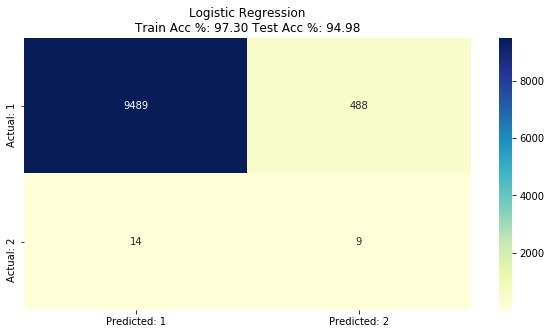

<Figure size 360x216 with 0 Axes>

              precision    recall  f1-score   support

           0      0.951     0.999     0.974      9503
           1      0.391     0.018     0.035       497

    accuracy                          0.950     10000
   macro avg      0.671     0.508     0.504     10000
weighted avg      0.923     0.950     0.928     10000



In [129]:
# ------------------------------------------------------------------------
# LOGISTIC REGRESSION
# ------------------------------------------------------------------------
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

LR_model = LogisticRegression(C=100, solver= 'newton-cg' ).fit(X_train_sm,y_train_sm)

LR_y_pred = LR_model.predict(X_mega_test)

LR_accuracy_train = LR_model.score(X_train_sm, y_train_sm)
LR_accuracy_test = LR_model.score(X_mega_test,Y)

LR_cm = confusion_matrix(y_true=Y, y_pred=LR_y_pred)

LR_df_conf = pd.DataFrame(data=LR_cm, columns=['Predicted: 1','Predicted: 2'], 
                       index=['Actual: 1','Actual: 2'])

plt.figure(figsize = (5,3))
sns.heatmap(LR_df_conf, annot=True,fmt='d',cmap="YlGnBu", ax =ax1).set_title(
    "Logistic Regression\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                LR_accuracy_train*100, LR_accuracy_test*100), fontsize=12)
plt.show()

print(metrics.classification_report(LR_y_pred, Y, digits=3))

### K-Nearest Neighbors (KNN)

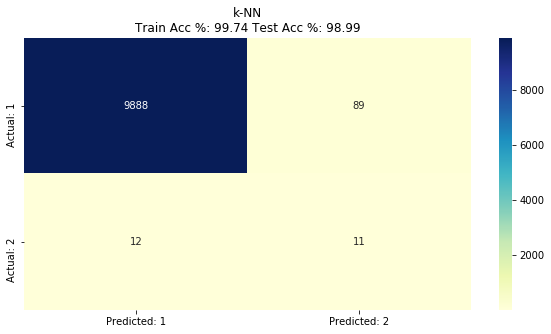

<Figure size 360x216 with 0 Axes>

              precision    recall  f1-score   support

           0      0.991     0.999     0.995      9900
           1      0.478     0.110     0.179       100

    accuracy                          0.990     10000
   macro avg      0.735     0.554     0.587     10000
weighted avg      0.986     0.990     0.987     10000



In [130]:
# ------------------------------------------------------------------------
# K-NEAREST NEIGHBOR (KNN)
# # ------------------------------------------------------------------------
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

kNN_model = KNeighborsClassifier(n_neighbors=10).fit(X_train_sm,y_train_sm)
knn_y_pred = kNN_model.predict(X_mega_test)

knn_accuracy_train = kNN_model.score(X_train_sm, y_train_sm)
knn_accuracy_test = kNN_model.score(X_mega_test,Y)

knn_cm = confusion_matrix(y_true=Y, y_pred=knn_y_pred)

knn_df_conf = pd.DataFrame(data=knn_cm, columns=['Predicted: 1','Predicted: 2'], 
                       index=['Actual: 1','Actual: 2'])

plt.figure(figsize = (5,3))
sns.heatmap(knn_df_conf, annot=True,fmt='d',cmap="YlGnBu", ax=ax1).set_title(
    "k-NN\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                knn_accuracy_train*100, knn_accuracy_test*100), fontsize=12)
plt.show()

print(metrics.classification_report(knn_y_pred, Y, digits=3))

# 6.MODEL EVALUATION <a class="anchor" id="chapter6"></a>

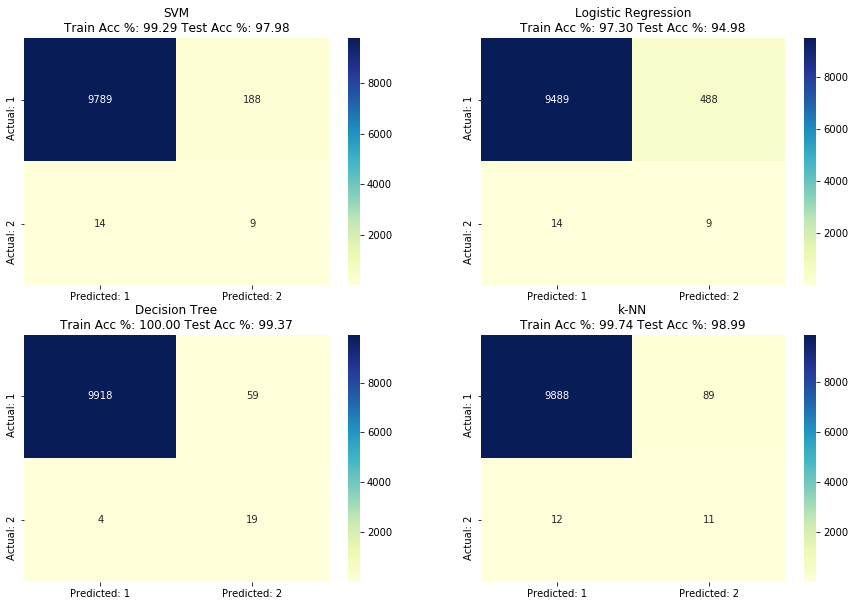

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

In [131]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(221)    
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# SUPPORTED VECTOR MACHINE (SVM)
plt.figure(figsize = (5,3))
sns.heatmap(SVM_df_conf, annot=True,fmt='d',cmap="YlGnBu", ax =ax1).set_title(
    "SVM\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                SVM_accuracy_train*100, SVM_accuracy_test*100), fontsize=12)

# ------------------------------------------------------------------------
# LOGISTIC REGRESSION
plt.figure(figsize = (5,3))
sns.heatmap(LR_df_conf, annot=True,fmt='d',cmap="YlGnBu", ax =ax2).set_title(
    "Logistic Regression\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                LR_accuracy_train*100, LR_accuracy_test*100), fontsize=12)

# ------------------------------------------------------------------------
# DECISION TREE
plt.figure(figsize = (5,3))
sns.heatmap(DT_df_conf, annot=True,fmt='d',cmap="YlGnBu", ax=ax3).set_title(
    "Decision Tree\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                dt_accuracy_train*100, dt_accuracy_test*100), fontsize=12)

# ------------------------------------------------------------------------
# K-NEAREST NEIGHBOR (KNN)
plt.figure(figsize = (5,3))
sns.heatmap(knn_df_conf, annot=True,fmt='d',cmap="YlGnBu", ax=ax4).set_title(
    "k-NN\nTrain Acc %: {:.2f} Test Acc %: {:.2f}".format(
                knn_accuracy_train*100, knn_accuracy_test*100), fontsize=12)
plt.show()

The best model for a binary classification is the Decision Tree as it manages to provide 4 false postives out of 23, predicted not fatal when the actual is fatal, (82.6% Pricison). Although the recall is very low but the cost of false negatives is very low compared to false positives. 

Below is a graph that shows the features ordered by importance in gaining information when going down the decision tree

Text(0.5, 1.0, 'Feature Importances Bar Chart')

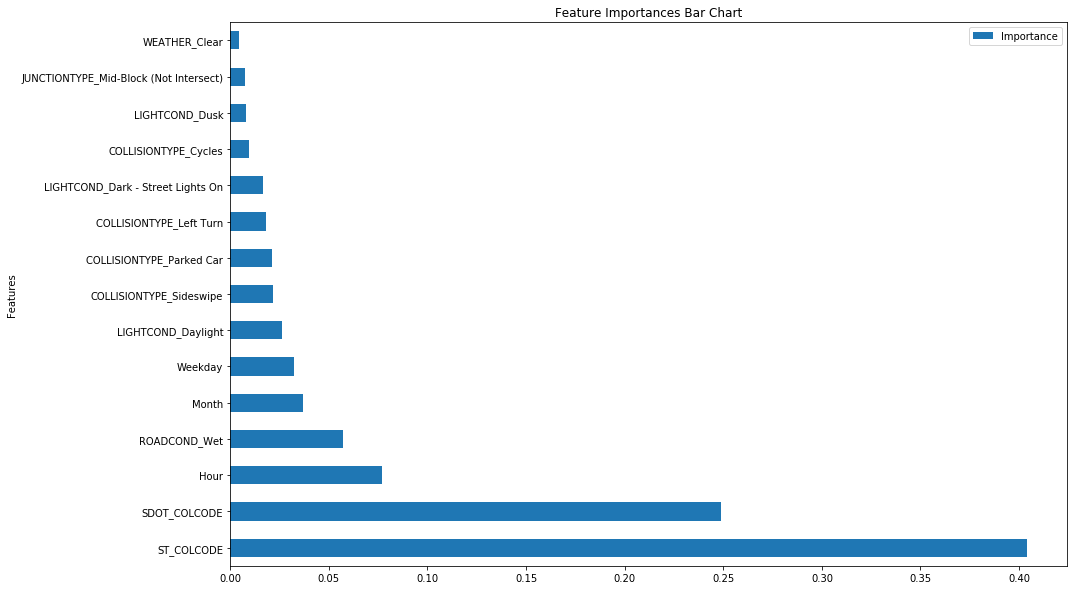

In [132]:
importance_dict = {'Features':df_dm2.columns[1:40], 'Importance':DT_model.feature_importances_}
df_importance = pd.DataFrame.from_dict(importance_dict)
df_importance.sort_values(by='Importance', ascending = False, inplace=True)
df_importance = df_importance.head(15)
df_importance
df_importance.plot.barh(x='Features', y='Importance', figsize=(15,10) )
plt.title('Feature Importances Bar Chart')

# 7.CONCLUSION <a class="anchor" id="chapter7"></a>

In conclusion, the data did not provide sufficient information for the model to predict the severity level out of 4 levels. However, the model successfully provided better results when predicting either one of two classes, fatal and not fatal. The feature importance chart showed that both state and Seattle department codes are the most important features in determining the severity of the accidents. Such codes label the type of accidents and they can be further investigated to show what type of accidents is more severe by only the code. The analysis and the predictive model can give both individuals and governments a better understanding of the most critical situations that could result in severe accidents.  